In [1]:
%autosave 30

Autosaving every 30 seconds


In [2]:
%matplotlib inline

In [3]:
import time

In [4]:
import math 
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
plt.style.use('ggplot')

In [6]:
from sklearn import preprocessing
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

In [7]:
import missingno as msno 

In [8]:
from sklearn import metrics as mr

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import model_selection, datasets, linear_model

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 

In [11]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

### Обоснование выбора датасета
Проблема ментального здоровья - одна из самых недооцененных проблем в сфере здравоохранения по всему миру.
<br>
Между тем, она влечет последствия для экономики, социальной сферы, непосредственно связана с вопросами прав человека.
<br>
Поэтому необходимо как можно раньше и точнее выявлять предрасположенность человека к ментальным расстройствам.
<br>
Особенно данный вопрос актуален при выборе места работы, продвижении на карьерной лестнице, найме персонала.
<br>
<br>
Взятый нами набор содержит результаты анкетирования работников насчет 
<br>
их ментального здоровья и отношения к психическим расстройствам их работодателей. 
<br>
Название датасета связано с тем, что исследователи акцентировали внимание 
<br>
на изучение проблемы ментальных заболеваний у людей, работающих, в технической сфере.
<br>
<br>
Данные были получены в 2014 году и загружены нами с платформы Kaggle.

### Описание данных

Набор данных включает в себя **следующие поля**:
<br>
<br>
**Timestamp** - дата записи данных
<br>
**Age** - возраст
<br>
**Gender** - гендер (не пол)
<br>
**Country** - родная страна опрашиваемого
<br>
Поля, содержащие в себе ответы на вопросы анкеты:
<br>
**state**: 
<br>
**self_employed**: 
<br>
Являетесь ли Вы самозанятым?
<br>
**family_history**: 
<br>
Есть ли у вас родственники с психическими заболеваниями?
<br>
**treatment**: 
<br>
Обращались ли вы за лечением по поводу психического расстройства?
<br>
**work_interfere**: 
<br>
Если у вас есть психическое заболевание, чувствуете ли вы, что оно мешает вашей работе?
<br>
**no_employees**:
<br>
Сколько сотрудников в вашей компании/организации?
<br>
**remote_work**: 
<br>
Работаете ли вы удаленно (вне офиса) хотя бы 50% времени?
<br>
**tech_company**:
<br>
Является ли ваш работодатель в первую очередь технологической компанией/организацией?
<br>
**benefits**: 
<br>
Предоставляет ли ваш работодатель пособия по психическому здоровью?
<br>
**care_options**: 
<br>
Знаете ли вы, какие варианты психиатрической помощи предоставляет ваш работодатель?
<br>
**wellness_program**: 
<br>
Ваш работодатель когда-нибудь обсуждал психическое здоровье в рамках программы оздоровления сотрудников?
<br>
**seek_help**: 
<br>
Предоставляет ли ваш работодатель ресурсы, чтобы узнать больше о проблемах психического здоровья и о том, как обратиться за помощью?
<br>
**anonymity**: 
<br>
Будет ли соблюдена ваша анонимность, если вы решите воспользоваться ресурсами для лечения психического здоровья или от злоупотребления психоактивными веществами?
<br>
**leave**: 
<br>
Насколько легко вам взять отпуск по болезни в связи с психическим заболеванием?
<br>
**mentalhealthconsequence**: 
<br>
Считаете ли вы, что обсуждение проблемы психического здоровья с вашим работодателем будет иметь негативные последствия?
<br>
**physhealthconsequence**: 
<br>
Считаете ли вы, что обсуждение проблемы физического здоровья с вашим работодателем будет иметь негативные последствия?
<br>
**coworkers**: 
<br>
Хотели ли бы вы обсудить проблему психического здоровья со своими коллегами?
<br>
**supervisor**: 
<br>
Хотели ли бы вы обсудить проблему психического здоровья с вашим непосредственным начальником?
<br>
**mentalhealthinterview**: 
<br>
Вы бы подняли вопрос психического здоровья с потенциальным работодателем в интервью?
<br>
**physhealthinterview**: 
<br>
Вы бы подняли вопрос физического здоровья с потенциальным работодателем на собеседовании?
<br>
**mentalvsphysical**: 
<br>
Считаете ли вы, что ваш работодатель относится к психическому здоровью так же серьезно, как и к физическому?
<br>
**obs_consequence**: 
<br>
Вы слышали или наблюдали негативные последствия для сотрудников с психическими расстройствами на вашем рабочем месте?
<br>
**comments**: 
<br>
Любые дополнительные замечания или комментарии

### Постановка задачи
Целевым признаком является $"treatment"$ - флаг, принимающий значение "No" = 0, если опрашиваемый не обращался за помощью по поводу психического заболевания и "Yes" = 1 - если обращался, по остальным признакам будем прогнозировать вероятность того, что человек, чьи данные были зафиксированы в ходе иссследования, имеет ментальное расстройство.
<br>
<br>
Таким образом, будем решать задачу ***бинарной классификации***.

In [12]:
data = pd.read_csv('mental_health_tech.csv')

In [13]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


## Описательный анализ и предобработка данных

В целях экономии времени нами было принято решение совместить некоторые этапы предобработки данных с их первичным рассмотрением.

Посмотрим, сколько записей было получено в результате исследования и сколько признаков/вопросов рассматривалось:

In [14]:
data.shape

(1259, 27)

Имеем выборку с $1259$ элементами и $27$ признаками.

### Исследование шкалы измерения каждого существенного признака

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

Отмечаем, что только столбец с данными по возрасту **Age** содержит числовые значения, остальные столбцы, судя по всему, включают в себя категориальные либо строковые значения.
<br> 
<br>
Посмотрим, какие уникальные значения находятся в каждом столбце. 
<br>
Признаки **Timestamp** и **comments** опустим, т. к. для каждого опрашиваемого работника они имеют уникальное значение.

In [16]:
for column in data.columns:
    if column != 'comments' and column != 'Timestamp':
        print(column,':', sep = '')
        print(*data[column].unique(), sep = ', ')

Age:
37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40, 38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, -29, 43, 56, 60, 54, 329, 55, 99999999999, 48, 20, 57, 58, 47, 62, 51, 65, 49, -1726, 5, 53, 61, 8, 11, -1, 72
Gender:
Female, M, Male, male, female, m, Male-ish, maile, Trans-female, Cis Female, F, something kinda male?, Cis Male, Woman, f, Mal, Male (CIS), queer/she/they, non-binary, Femake, woman, Make, Nah, All, Enby, fluid, Genderqueer, Female , Androgyne, Agender, cis-female/femme, Guy (-ish) ^_^, male leaning androgynous, Male , Man, Trans woman, msle, Neuter, Female (trans), queer, Female (cis), Mail, cis male, A little about you, Malr, p, femail, Cis Man, ostensibly male, unsure what that really means
Country:
United States, Canada, United Kingdom, Bulgaria, France, Portugal, Netherlands, Switzerland, Poland, Australia, Germany, Russia, Mexico, Brazil, Slovenia, Costa Rica, Austria, Ireland, India, South Africa, Italy, Sweden, Colombia, Latvia, Romania, Belgium,

Видим, что все признаки, за исключением **no_employees** измеряются по номинальной шкале. 
<br>
Признаки **Country** и **state** определяются строковыми значениями (название страны/аббревиатура штата), а единственный числовой признак **Age** имеет экстремальные, бессмысленные для нас значения.
Также в данных, по некоторым столбцам, есть пропуски.

### Анализ количества и распределения отсутствующих значений

Количество пропущенных значений по столбцам:

In [17]:
data.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

Таким образом, 4 столбца содержат пропуски. 
<br>
<br>
Эту информацию представим в более наглядном виде, воспользуемся библиотекой **msno**, 
<br>
предназначенной для визуализации пропущенных значений. 
<br>
Библиотека предварительно была установлена в терминале командой ***pip install msno***

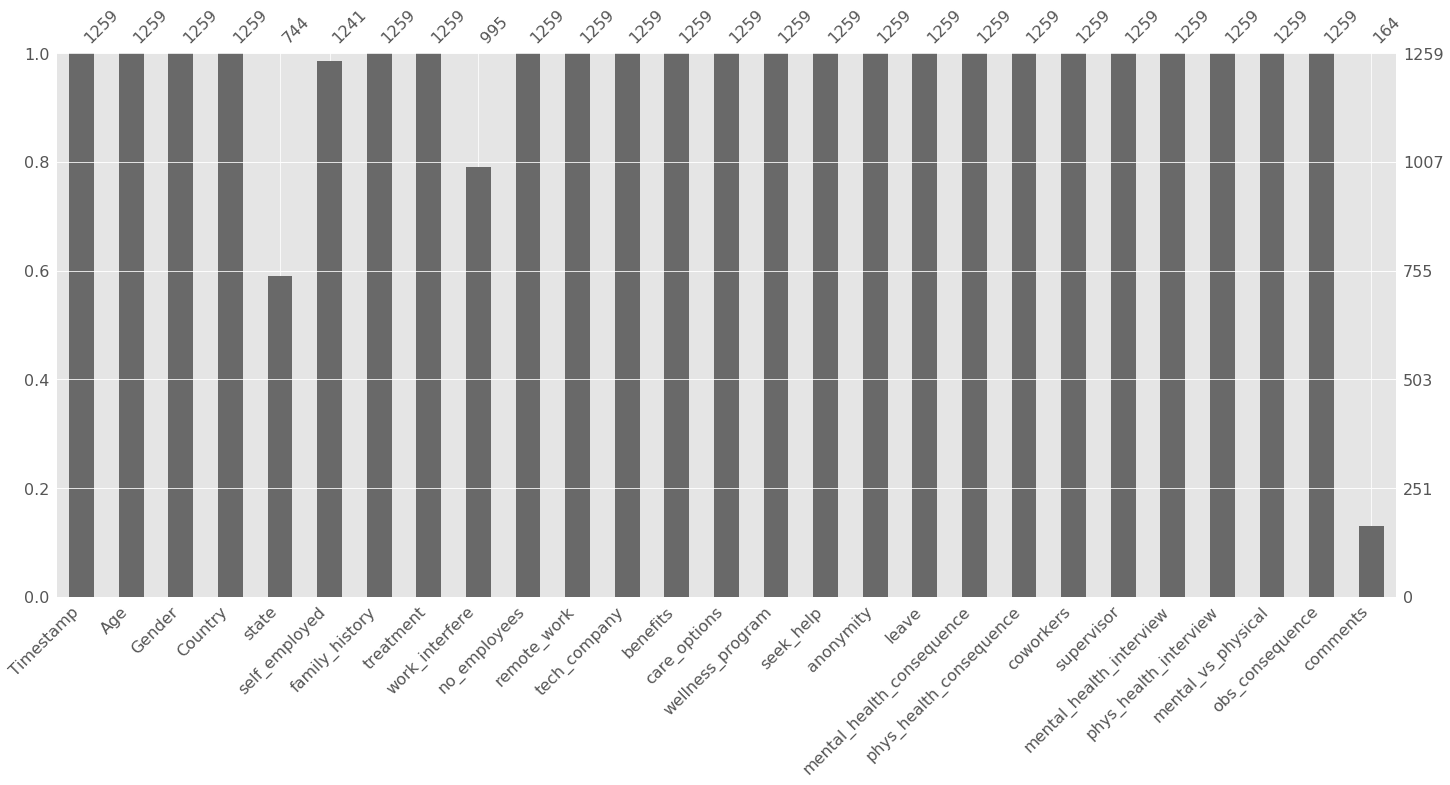

In [18]:
msno.bar(data) 

Удалим несущественные, на наш взгляд, признаки:
<br>
- **Timestamp** - время прохождения опроса, вряд ли влияет на target
<br>
- **comments** - дополнительная информация, индивидуальная для каждого респондента, возможно в ней содержатся некие полезные сведения, однако в данной работе не будем заниматься NLP
<br>
- **state** - маловероятно, что предпочтения о жизни в каком-то Штате играют роль, скорее всего это избыточные данные
<br>
- **Country** - будем исследовать тенденции о наличии психических расстройств у работников по миру в целом

In [19]:
data = data.drop(['Timestamp'], axis = 1)
data = data.drop(['state'], axis = 1)
data = data.drop(['comments'], axis = 1)
data = data.drop(['Country'], axis = 1)

In [20]:
# формат визуализации с помощью библиотеки seaborn, техническая строка
sns.set(style = "ticks", color_codes = True)

### Преобразование "проблемных" признаков

При беглом просмотре данных были выявлены проблемы с представлением признаков в надлежайшем для анализа виде.
<br>
Попробуем решить их.
<br>
<br>
Избавимся от экстремальных значений возраста респондентов:

In [21]:
data['Age']

0       37
1       44
2       32
3       31
4       31
        ..
1254    26
1255    32
1256    34
1257    46
1258    25
Name: Age, Length: 1259, dtype: int64

В датасете присутствуют отрицательные значения:

In [22]:
data['Age'].min()

-1726

И очень большие значения-выбросы:

In [23]:
data['Age'].max()

99999999999

Напишем функцию, с помощью которой будем заменять выбросы в столбце с возрастом **Age** на **NaN**:

In [24]:
data['Age'] = pd.to_numeric(data['Age'], errors = 'coerce')

def age_process(age):
    # установим приемлимые границы возраста как от 0 до 100 лет 
    if age >= 0 and age <= 100:
        # если значение попадает в заданный интервал, то ничего не меняем
        return age
    else:
        # в противном случае 
        return np.nan
data['Age'] = data['Age'].apply(age_process)

Выведем количество искусственно добавленных пропусков **NaN** в колонке **Age**:

In [25]:
data['Age'].isnull().sum()

5

Т. е. исходных датасет содержал 5 значений-выбросов возраста участников исследования.

### Построение эмпирического распределения каждого существенного признака

Для возраста **Age**:

Text(0.5, 0, 'Возраст')

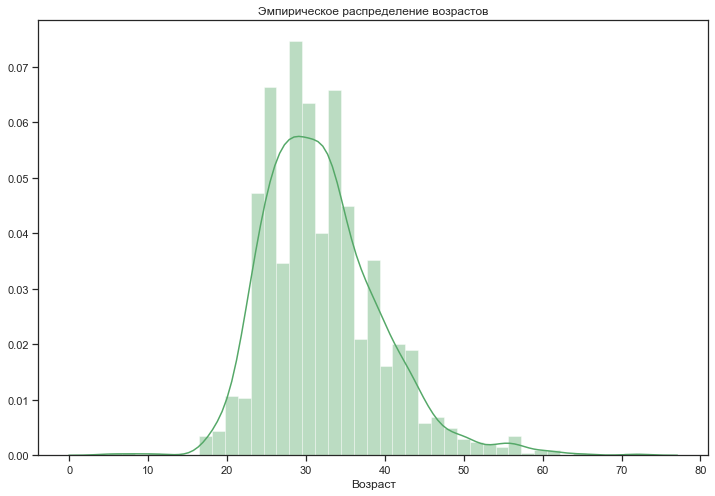

In [26]:
plt.figure(figsize = (12,8))
sns.distplot(data["Age"], color = "g")
plt.title("Эмпирическое распределение возрастов")
plt.xlabel("Возраст")

Таким образом, распределение возрастов ассиметрично (скошено вправо). 
<br>
Среднее значение - в районе 30 лет.
<br>
Скорее всего, данные по этому признаку распределены не по нормальному закону.

Для гендера **Gender**:

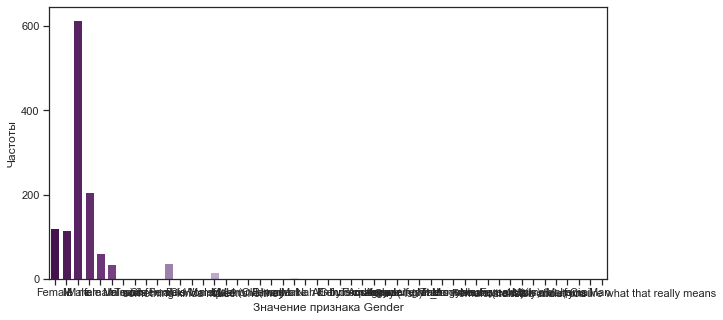

In [27]:
ax = sns.countplot(x = data['Gender'], palette = "PRGn")
sns.set(font_scale = 2)
title = 'Значение признака Gender'
ax.set_xlabel(title)
ax.set_ylabel('Частоты')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

Видим, что данные содержат множество разрозненных строковых значений и нуждаются в предобработке.
<br>
Поэтому более информативное, эмпирическое распределение участников исследования по гендерам построим позднее.

Для прочих независимых признаков (столбцов):

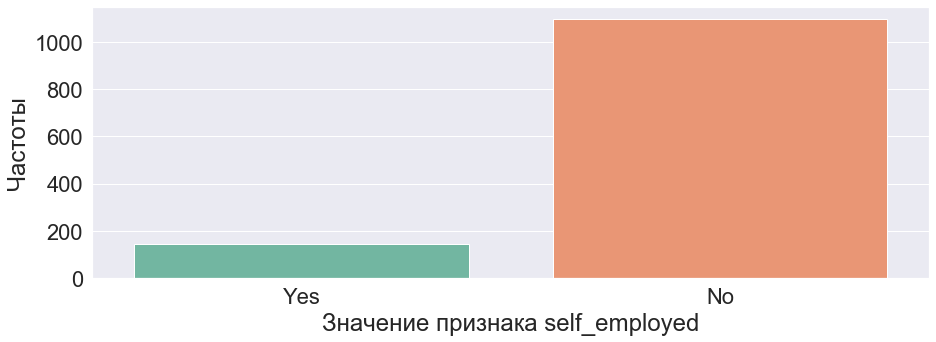

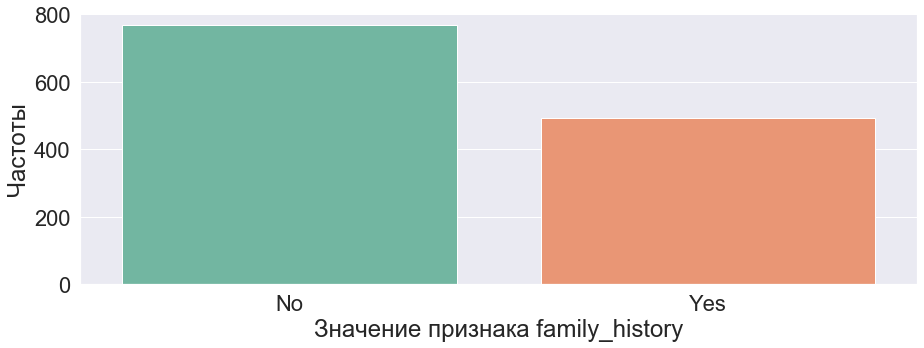

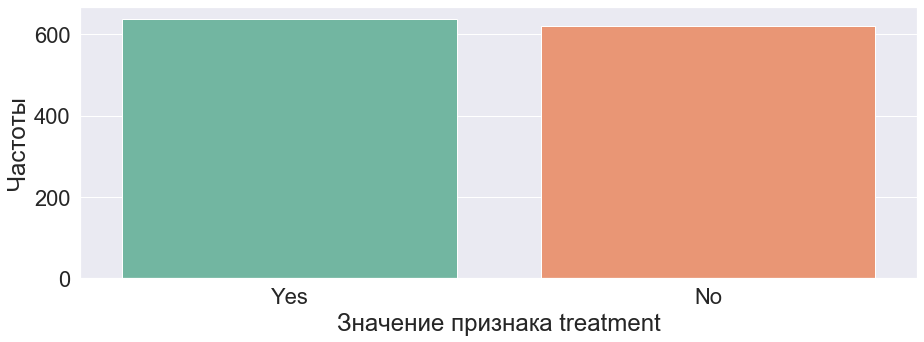

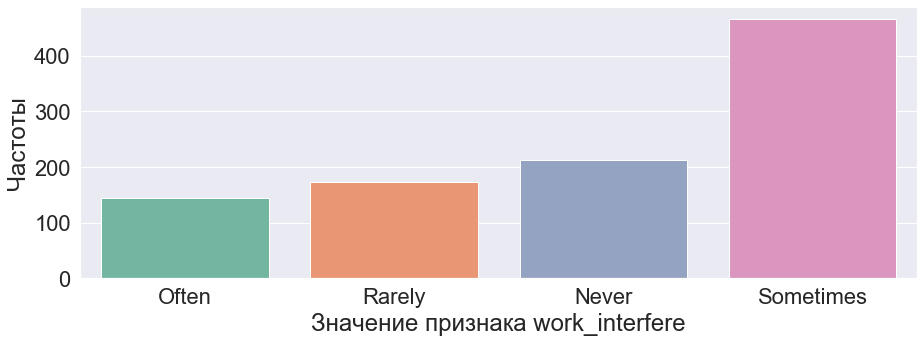

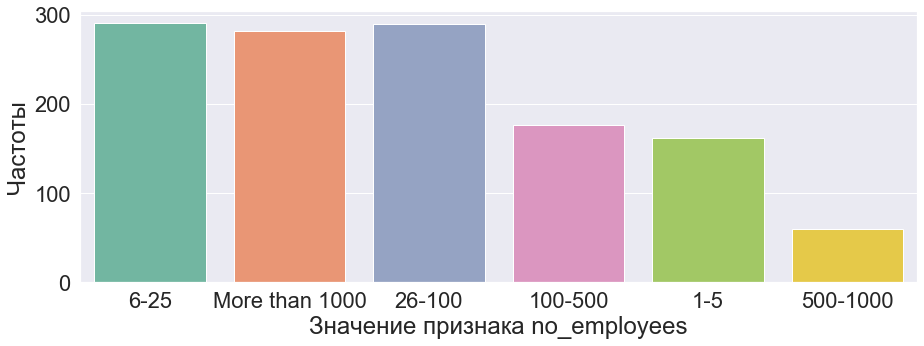

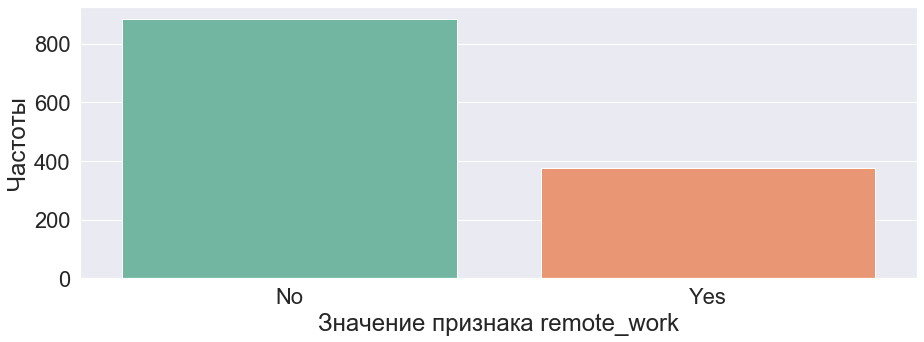

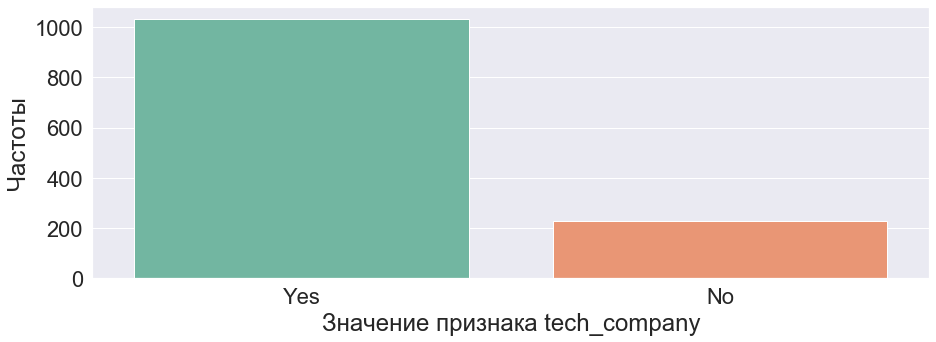

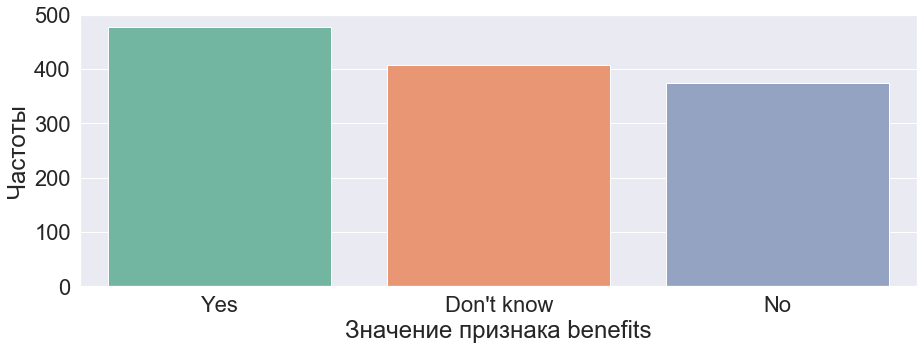

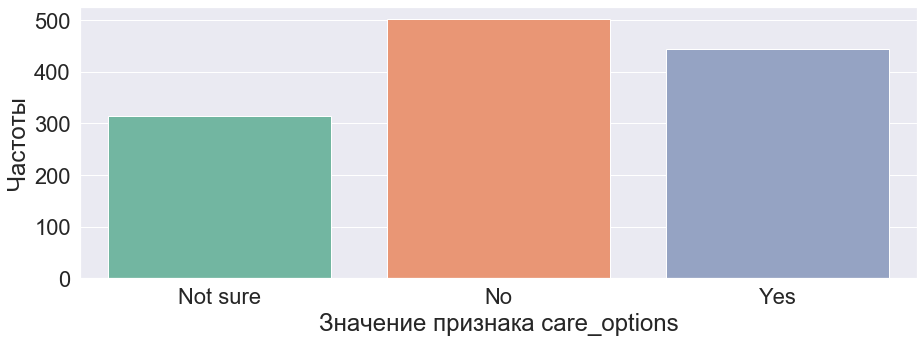

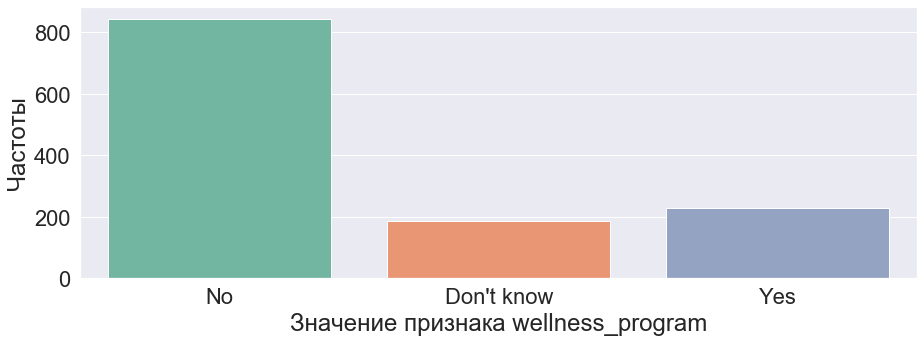

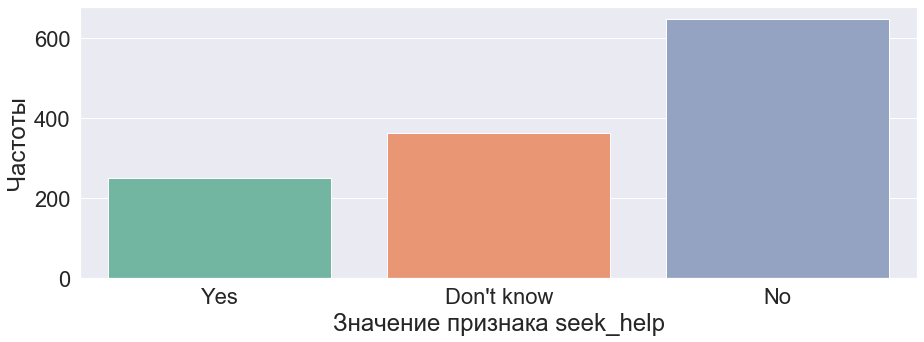

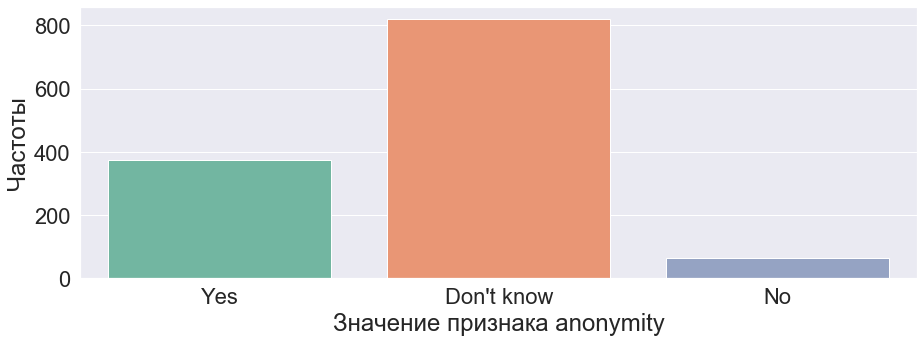

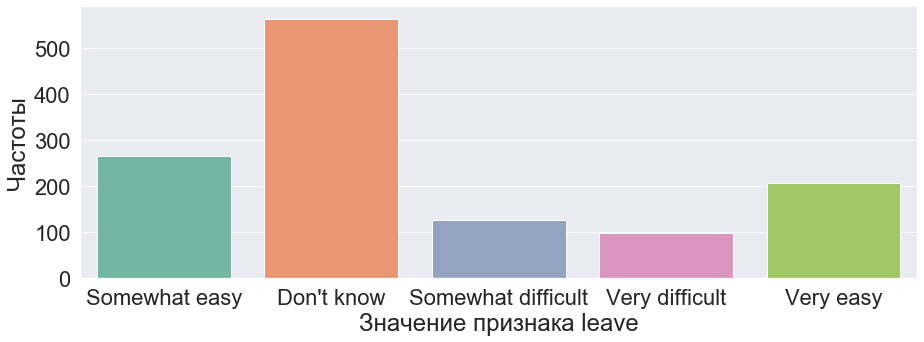

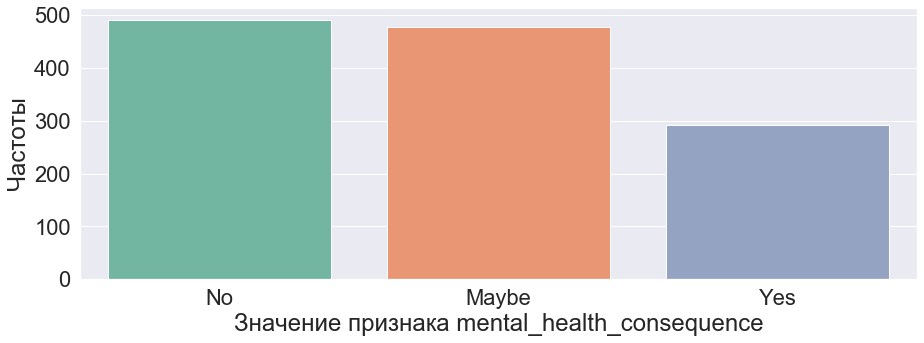

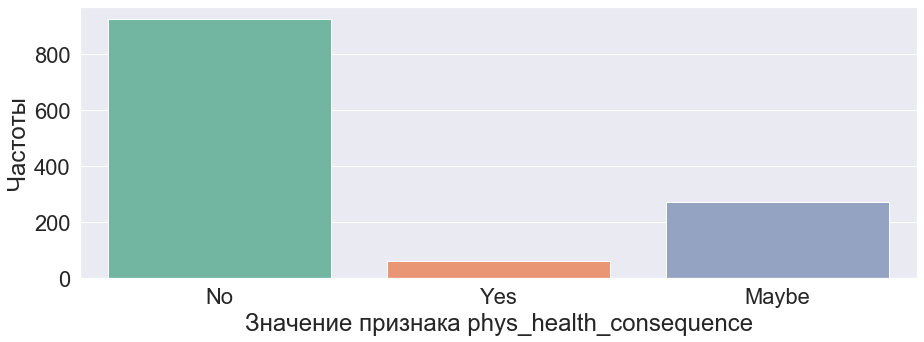

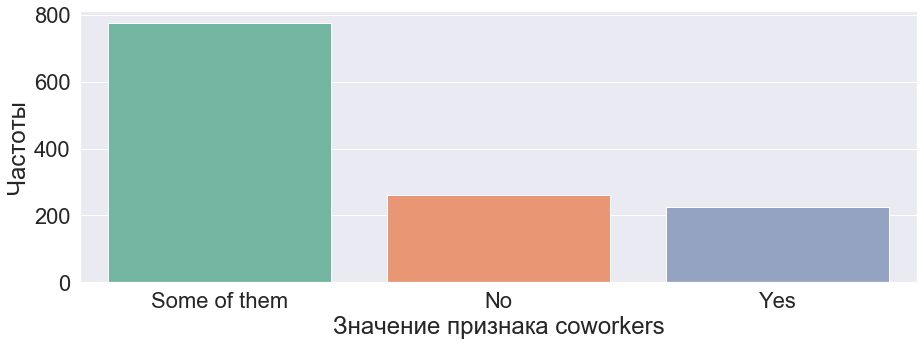

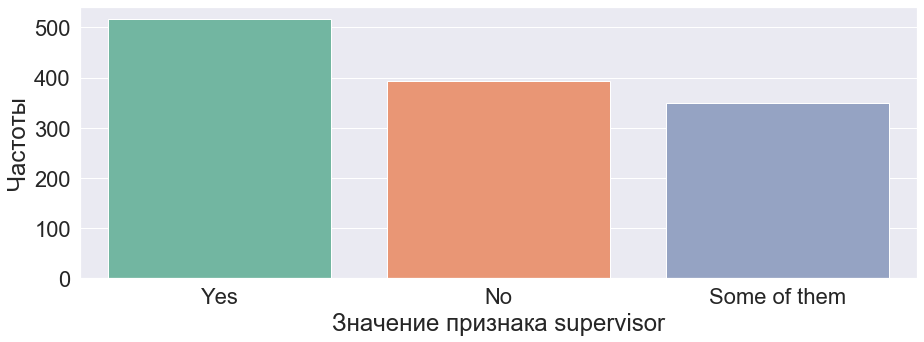

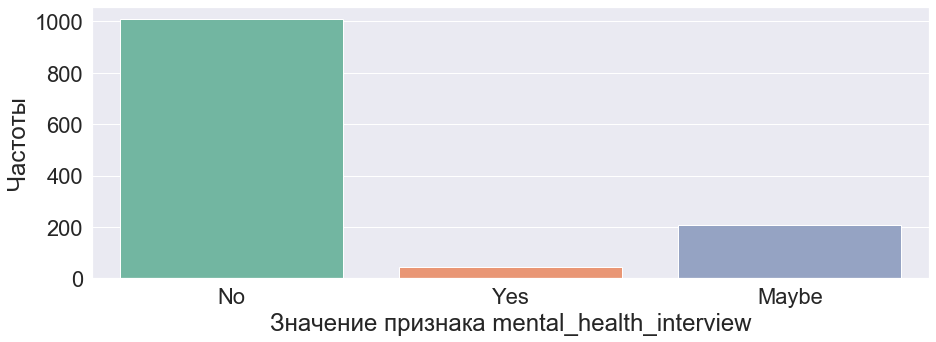

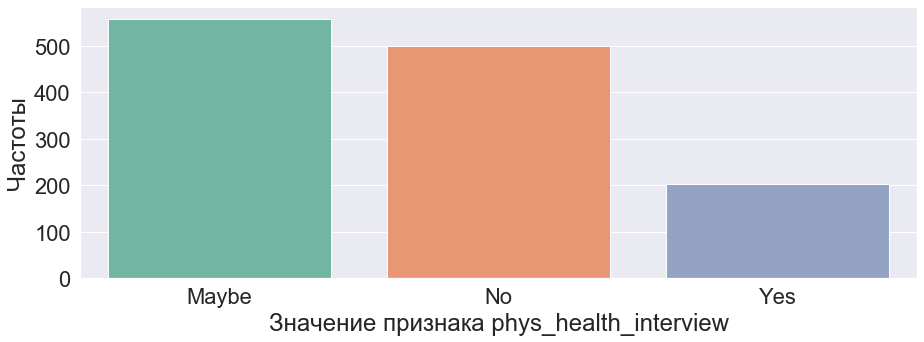

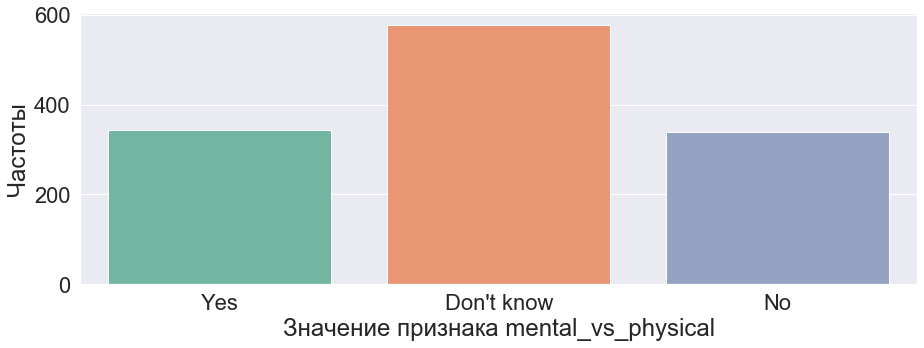

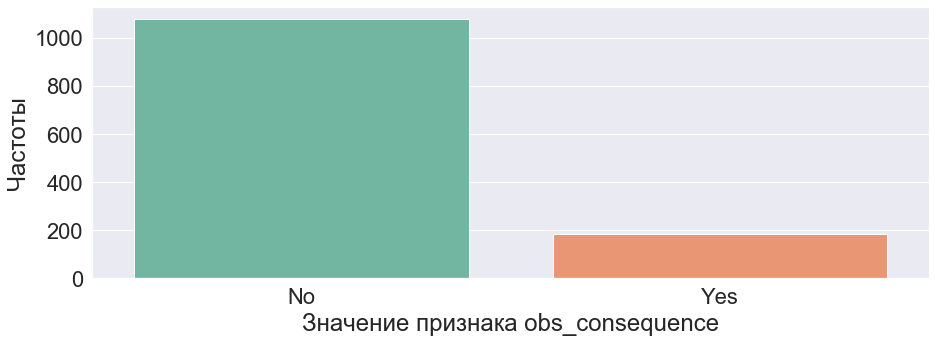

In [28]:
p = list(data.columns)
del p[0:2]
for column in p:
    ax = sns.countplot(x = data[column], palette = "Set2")
    sns.set(font_scale = 2)
    #ax.set_ylim(top = 400)
    title = 'Значение признака ' + column
    ax.set_xlabel(title)
    ax.set_ylabel('Частоты')
    fig = plt.gcf()
    fig.set_size_inches(15, 5)
    plt.show()

Построим эмпирическое распределение целевого признака:

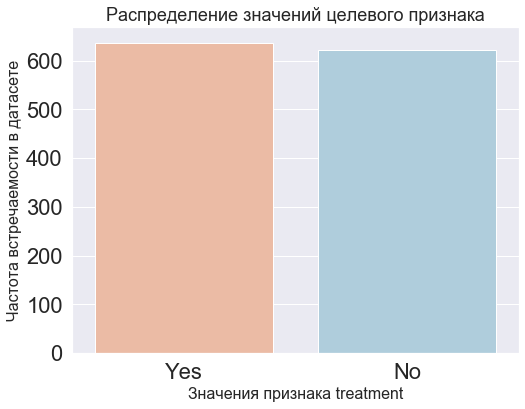

In [29]:
ax = sns.countplot(x = data['treatment'], palette = "RdBu")
sns.set(font_scale = 2)
ax.set_title('Распределение значений целевого признака', fontsize = 18)
title = 'Значения признака treatment'
ax.set_xlabel(title, fontsize = 16)
ax.set_ylabel('Частота встречаемости в датасете', fontsize = 16)
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.show()

Видим, что большинство наборов данных нельзя ассоциировать с положительным или отрицательным классом.
<br>
Т. е. имеет место равномерность в распределении значений признака, по которому будем проводить классификацию.

Удалим колонку **self_employed**, так как бинарные значения в ней распределены крайне неравномерно.
<br>
Кроме того, она содержит большое количество пропусков.

In [30]:
data = data.drop(['self_employed'], axis = 1)

#### Введение нового признака для учета возраста поинтервально

Группируем данные о возрасте респондентов - т. е. будем измерять его по интервальной шкале, а не номинальной.
<br>
Это нужно для удобства визуализации данных и может пригодиться при построении моделей машинного обучения.

Посмотрим, какой минимальный возраст у респондента:

In [31]:
# минимальный возраст опрашиваемого = 5 лет
data['Age'].min()

5.0

Посмотрим, какой максимальный возраст у респондента:

In [32]:
# максимальный возраст опрашиваемого = 72 года
data['Age'].max()

72.0

Исходя из полученной информации разделим всех респондентов на 4 категории по возрасту:

In [33]:
data['age group'] = pd.cut(data['Age'], [0, 21, 30, 50, 80], 
                           labels = ["0-21", "22-30", "31-50", "51-80"], 
                           include_lowest = True)

In [34]:
data['age group'].head(5)

0    31-50
1    31-50
2    31-50
3    31-50
4    31-50
Name: age group, dtype: category
Categories (4, object): [0-21 < 22-30 < 31-50 < 51-80]

Таким образом, получили 4 возрастные группы: от 0 до 21 года, от 22 до 30 лет, от 31 до 50 лет, от 51 до 80 лет.

In [35]:
data.head(5)

,Age,Gender,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age group
0,37.0,Female,No,Yes,Often,6-25,No,Yes,Yes,Not sure,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,31-50
1,44.0,M,No,No,Rarely,More than 1000,No,No,Don't know,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,31-50
2,32.0,Male,No,No,Rarely,6-25,No,Yes,No,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,31-50
3,31.0,Male,Yes,Yes,Often,26-100,No,Yes,No,Yes,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,31-50
4,31.0,Male,No,No,Never,100-500,Yes,Yes,Yes,No,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,31-50


#### Окончательное избавление от пропусков

Посмотрим на еще один "подозрительный" столбец датасета:

In [36]:
data['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

У нас остался последний столбец, содержащие пропуски в значениях - **work_interfere()**. Удалим строки с ними.

In [37]:
df = data.dropna()

И вновь построим эмпирическое распределение целевого признака:

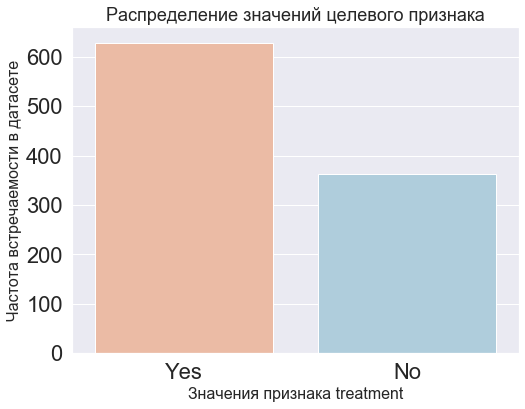

In [38]:
ax = sns.countplot(x = df['treatment'], palette = "RdBu")
sns.set(font_scale = 2)
ax.set_title('Распределение значений целевого признака', fontsize = 18)
title = 'Значения признака treatment'
ax.set_xlabel(title, fontsize = 16)
ax.set_ylabel('Частота встречаемости в датасете', fontsize = 16)
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.show()

Выходит, что нельзя просто удалить строки, содержащие пропуски по признаку **work_interfere**.
<br>
Тогда заменим их новым значением - ***'No info'***:

In [39]:
data['work_interfere'] = data['work_interfere'].fillna('No info' )
data['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', 'No info'], dtype=object)

In [40]:
# пропусков по данному признаку больше нет
data['work_interfere'].isna().sum()

0

Удалим оставшиеся пропуски:

In [41]:
data['Age'].isna().sum()

5

In [42]:
data = data.dropna()

Убедимся в том, что больше у нас в датасете нет пропущенных значений:

In [43]:
data.isna().sum()

Age                          0
Gender                       0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
age group                    0
dtype: int64

Новый размер датасета:

In [44]:
data.shape

(1254, 23)

#### Группировка ответов про гендеры

Для упрощения дальнейшего анализа заменим строковые значения признака **Gender** на категориальные (3 "флага"):
<br>
***male*** - мужской, ***female*** - женский, ***non-binary*** - прочий (небинарный)

In [45]:
# вывод многообразия гендеров
gender = data['Gender'].str.lower()
gender.unique()

array(['female', 'm', 'male', 'male-ish', 'maile', 'trans-female',
       'cis female', 'f', 'something kinda male?', 'cis male', 'woman',
       'mal', 'male (cis)', 'queer/she/they', 'non-binary', 'femake',
       'make', 'nah', 'enby', 'fluid', 'genderqueer', 'female ',
       'androgyne', 'agender', 'cis-female/femme', 'guy (-ish) ^_^',
       'male leaning androgynous', 'male ', 'man', 'trans woman', 'msle',
       'neuter', 'female (trans)', 'queer', 'female (cis)', 'mail',
       'a little about you', 'malr', 'femail', 'cis man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [46]:
# мужские
male = ['male', 'm', 'male-ish', 'cis male', 'mal', 'make', 'male ', 'msle', 'mail', 'malr', 'cis man']
# женские
female = ['female', 'cis female', 'f', 'woman', 'female', 'cis-female/femme', 'female (cis)', 'femail', 'femake']
# гендер-флюидные - все остальные

In [47]:
# замена старых значений на новые - группировка
for (row, col) in data.iterrows():
    if str.lower(col.Gender) in male:
        data['Gender'].replace(to_replace = col.Gender, value = 'male', inplace = True)
    elif str.lower(col.Gender) in female:
        data['Gender'].replace(to_replace = col.Gender, value = 'female', inplace = True)   
    else:
        data['Gender'].replace(to_replace = col.Gender, value = 'non-binary', inplace = True)

In [48]:
# проверка
data['Gender'].unique()

array(['female', 'male', 'non-binary'], dtype=object)

Построим эмпирическое распределение сгруппированных гендеров:

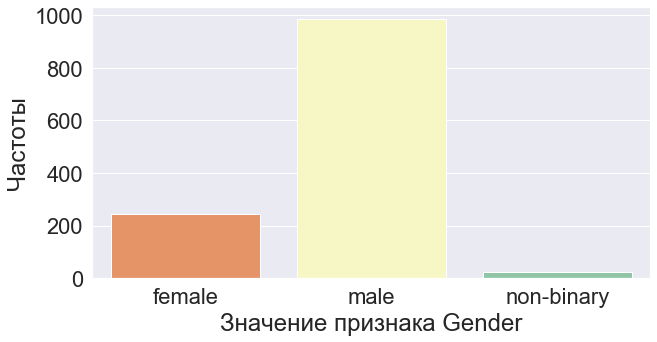

In [49]:
ax = sns.countplot(x = data['Gender'], palette = "Spectral")
sns.set(font_scale = 2)
title = 'Значение признака Gender'
ax.set_xlabel(title)
ax.set_ylabel('Частоты')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

Таким образом, большинство опрашиваемых идентифицируют себя как мужчин, чуть меньшее - как женщин и реже всего встречались небинарные персоны.

### Приведение всех признаков к бинарной либо числовой шкале
Возраст **Age**, являющийся числовым признаком, в данном случае обрабатывать не будем. 
<br>
Позже можно будет провести нормализацию значений данного признака.

In [50]:
labelDict = {}
for feature in data:
    if feature != 'Age':
        le = preprocessing.LabelEncoder()
        le.fit(data[feature])
        le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        data[feature] = le.transform(data[feature])
        labelKey = 'label_' + feature
        labelValue = [*le_name_mapping]
        labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

label_Gender ['female', 'male', 'non-binary']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ['Never', 'No info', 'Often', 'Rarely', 'Sometimes']
label_no_employees ['1-5', '100-500', '26-100', '500-1000', '6-25', 'More than 1000']
label_remote_work ['No', 'Yes']
label_tech_company ['No', 'Yes']
label_benefits ["Don't know", 'No', 'Yes']
label_care_options ['No', 'Not sure', 'Yes']
label_wellness_program ["Don't know", 'No', 'Yes']
label_seek_help ["Don't know", 'No', 'Yes']
label_anonymity ["Don't know", 'No', 'Yes']
label_leave ["Don't know", 'Somewhat difficult', 'Somewhat easy', 'Very difficult', 'Very easy']
label_mental_health_consequence ['Maybe', 'No', 'Yes']
label_phys_health_consequence ['Maybe', 'No', 'Yes']
label_coworkers ['No', 'Some of them', 'Yes']
label_supervisor ['No', 'Some of them', 'Yes']
label_mental_health_interview ['Maybe', 'No', 'Yes']
label_phys_health_interview ['Maybe', 'No', 'Yes']
label_mental_vs_physical ["Don't kn

Ранее мы сопоставили возрасту каждого респондента определенный период жизни по интервальной шкале (столбец **age group**), то теперь удалим столбец **Age** - мы хотим определить степень влияния возраста респондента на вероятность наличия у него проблемы с ментальным здоровьем не по конкретному значению, а по принадлежности к конкретной возрастной группе.

Обработанный датасет:

In [51]:
data.head(10)

,Age,Gender,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age group
0,37.0,0,0,1,2,4,0,1,2,1,...,2,1,1,1,2,1,0,2,0,2
1,44.0,1,0,0,3,5,0,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,32.0,1,0,0,3,4,0,1,1,0,...,1,1,1,2,2,2,2,1,0,2
3,31.0,1,1,1,2,2,0,1,1,2,...,1,2,2,1,0,0,0,1,1,2
4,31.0,1,0,0,0,1,1,1,2,0,...,0,1,1,1,2,2,2,0,0,2
5,33.0,1,1,0,4,4,0,1,2,1,...,0,1,1,2,2,1,0,0,0,2
6,35.0,0,1,1,4,0,1,1,1,0,...,1,0,0,1,0,1,1,0,0,2
7,39.0,1,0,0,0,0,1,1,1,2,...,0,1,1,0,0,1,1,1,0,2
8,42.0,0,1,1,4,1,0,1,2,2,...,3,0,1,2,2,1,0,1,0,2
9,23.0,1,0,0,0,2,0,1,0,0,...,0,1,1,2,2,0,0,2,0,1


### Построение корреляционной матрицы

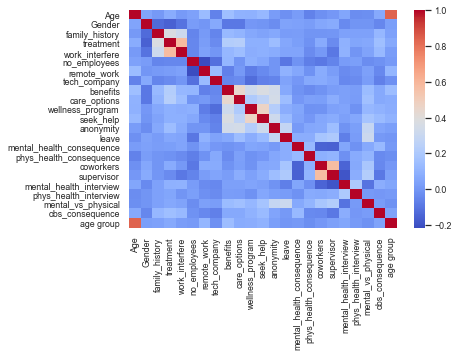

In [52]:
# По всем признакам
sns.set(font_scale = 0.8)
corrMatrix = sns.heatmap(data.corr(), annot = False, cmap = "coolwarm")

In [53]:
print('Всего в датасете оставили', data.shape[1], 'признака')

Всего в датасете оставили 23 признака


Отметим наиболее коррелированные с целевой переменной признаки (половину от их общего количества).
<br>
Построим корреляционную матрицу с теми переменными, которые наиболее тесно связаны со значением целевого признака:

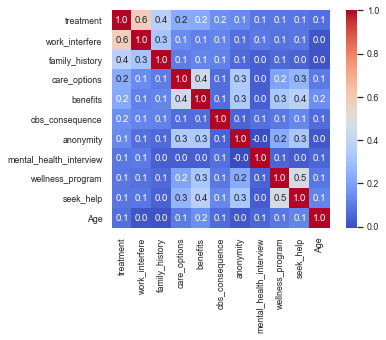

In [54]:
matrix_corr = data.corr() # сохраняем корреляционную матрицу
n = 12 # возьмем столько параметров (признаков)
cols = matrix_corr.nlargest(11, 'treatment')['treatment'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale = 0.8)
hm = sns.heatmap(cm, annot = True, square = True, fmt = '.1f', yticklabels = cols.values, 
                 xticklabels = cols.values, cmap = "coolwarm")
plt.show()

In [55]:
corrls = data.corr()['treatment'].sort_values()
corrls

Gender                      -0.155747
no_employees                -0.047002
supervisor                  -0.033276
tech_company                -0.032859
phys_health_consequence     -0.013064
remote_work                  0.026919
mental_health_consequence    0.027866
phys_health_interview        0.051138
leave                        0.059826
mental_vs_physical           0.061378
age group                    0.067755
coworkers                    0.069946
Age                          0.075266
seek_help                    0.090009
wellness_program             0.092486
mental_health_interview      0.094744
anonymity                    0.142462
obs_consequence              0.154541
benefits                     0.226160
care_options                 0.234806
family_history               0.378069
work_interfere               0.580788
treatment                    1.000000
Name: treatment, dtype: float64

Таким образом, наибольшее влияние на вероятность обращения респондента за помощью по поводу ментального расстройства оказывают такие характеристики как:
<br>
- определяемый самим человеком гендер **(Gender)** 
<br>
- его самоощущение о том, мешает ли ментальные особенности работе **(work_interfere)**
<br>
- наличие родственников с психическими отклонениями **(family_history)**
<br>
- наличия финансирования работодателем лечения психических заболеваний **(benefits)**
<br>
- информированность о возможностях предоставления помощи от компании **(care_options)**
<br>
- знание о последствиях обращения за психиатрической помощью для карьеры **(obs_consequence)** 
<br>
- уверенность в наличии или отсутствии анонимности в случае прохождения курса лечения **(anonymity)** 
<br>
<br>
Выделяем именно эти признаки, так как значение коэффициента корреляции с целевым признаком у них $> 0.1$

### Построение совместного распределения каждого признака и целевой переменной

In [56]:
important_columns = ['Gender', 'work_interfere', 'care_options',
                      'benefits', 'obs_consequence', 'anonymity']

In [57]:
data[important_columns[0]]

0       0
1       1
2       1
3       1
4       1
       ..
1254    1
1255    1
1256    1
1257    0
1258    1
Name: Gender, Length: 1254, dtype: int32

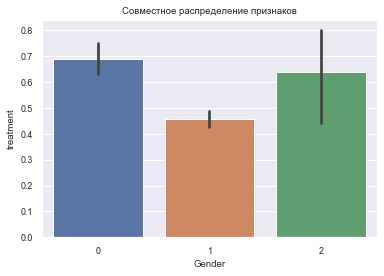

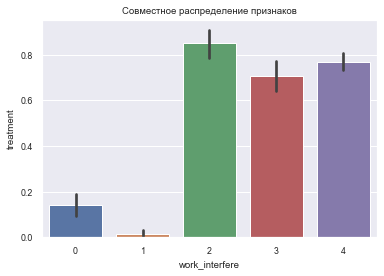

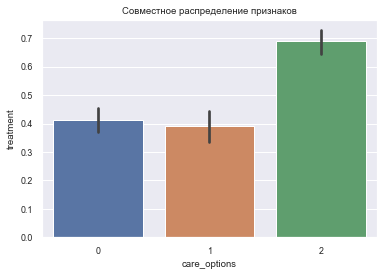

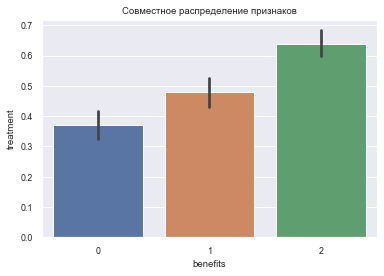

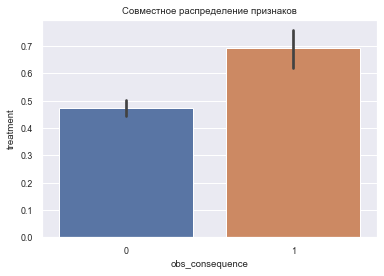

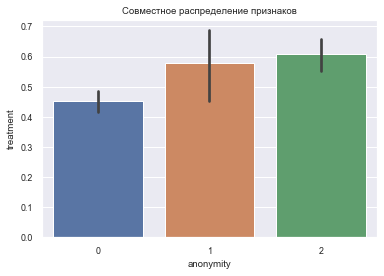

In [58]:
for i in important_columns:
    sns.barplot(x = data[i], y = data['treatment'])
    plt.title('Совместное распределение признаков')
    plt.ylabel('treatment')
    plt.xlabel(i)
    plt.show()

### Распределение целевого признака по гендеру и возрасту

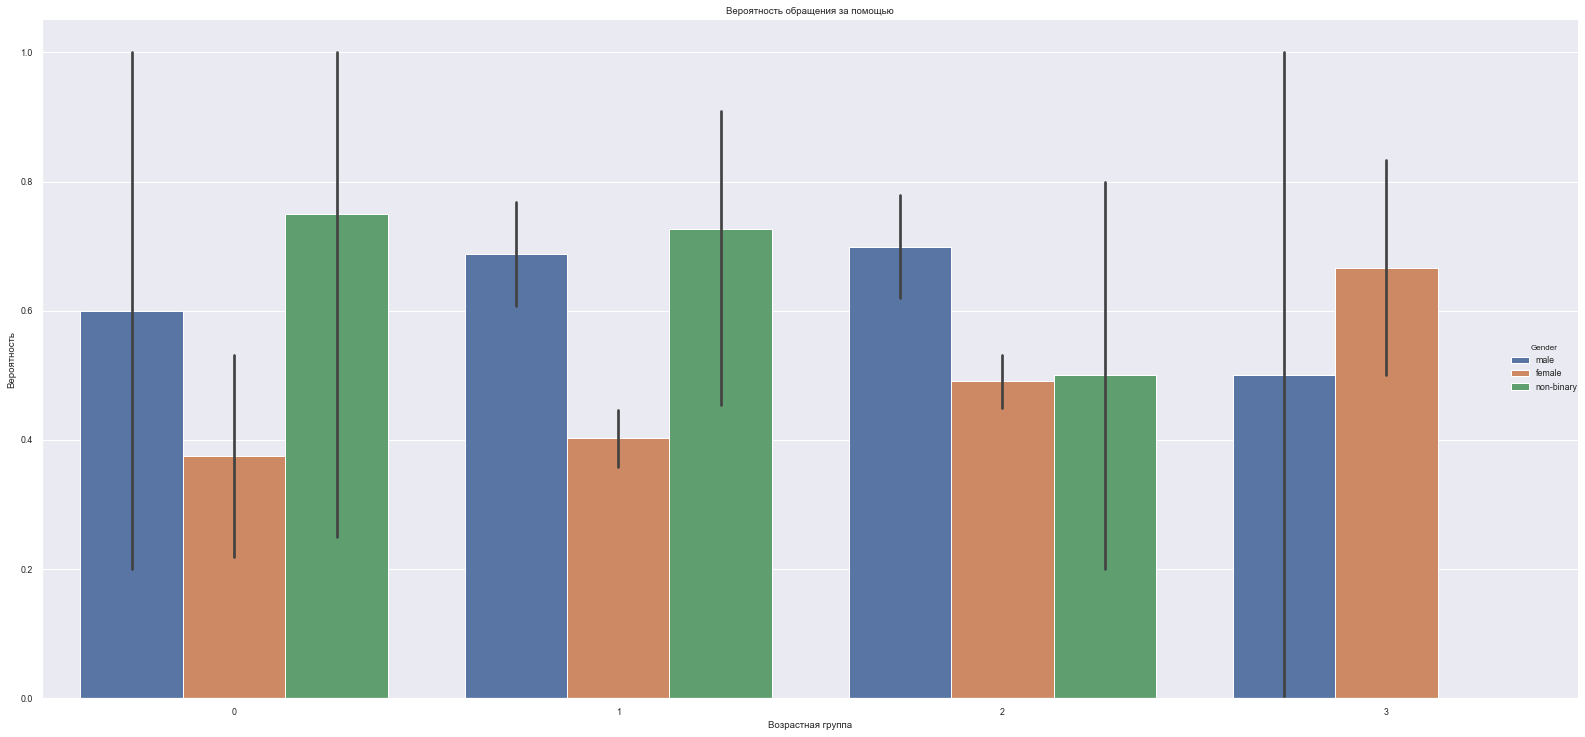

In [59]:
pl = sns.catplot(x = 'age group', y = 'treatment', hue = 'Gender', data = data, kind = 'bar')
new_labels = ['male', 'female', 'non-binary']
for t, l in zip(pl._legend.texts, new_labels): t.set_text(l)
plt.title('Вероятность обращения за помощью')
plt.ylabel('Вероятность')
plt.xlabel('Возрастная группа')
pl.fig.subplots_adjust(top = 2.0, right = 4.0)
plt.show()

На основании данной визуализации можно сделать следующие выводы:
<br>
<br>
1) Среди женщин больше всего обращений по поводу психических расстройств зафиксировано от респонденток старше 50 лет
<br>
2) Среди мужчин больше всего обращений от представителей молодой и средней возрастной групп
<br>
3) Наибольшее количество жалоб на ментальное здоровье можно отметить у небинарных персон, причем чем младше респондент, тем с большей вероятностью он является ментально нездоровым
<br>
<br>
Вкупе с тем, что согласно эмпирическому распределению небинарных персон - наименьшее количество среди всех участников исследования (значительно меньше чем мужчин) подобная картина заставляет задуматься о том, что небинарные персоны - в группе риска по наличию психических расстройств различного рода.

## Построение простых моделей

Прежде чем решать задачу классификации нормализуем значения в столбце **Age**:

In [60]:
scaler = MinMaxScaler()
data['Age'] = scaler.fit_transform(data[['Age']])

In [61]:
data['Age'].head(4)

0    0.477612
1    0.582090
2    0.402985
3    0.388060
Name: Age, dtype: float64

Создадим новый датафрейм, в который включим все регрессоры, которые могут быть использованы в алгоритмах обучения моделей:

In [62]:
# удаление столбца с таргетом
new_data = data.drop(['treatment'], axis = 1)
# удаление вспомогательного признака
new_data = new_data.drop(['age group'], axis = 1)

Разделим набор данных на обучающую (**80% набора**) и тестирующую (**20% набора**) выборки:

In [63]:
columns = new_data.columns
x = new_data[columns]
y = data['treatment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)

### Об использовании метрик

Разделим спрогнозированные значения на 4 категории:
<br>
<br>
$TP$ - количество объектов, принадлежащих и отнесенных к положительному  классу ($treatment = 1$)
<br> 
$TN$ - количество объектов, принадлежащих и отнесенных к отрицательному классу ($treatment = 0$)
<br>
$FP$ - количество объектов, принадлежащих к отрицательному, но отнесенных к положительному классу
<br>
$FN$ - количество объектов, принадлежащих к положительному, но отнесенных к отрицательному классу

При оценке результатов работы применяемых алгоритмов классификации будем использовать следующие метрики:
<br>
<br>
$Accuracy$: 
<br>
$$\frac{TP + TN}{TP + TN + FP + FN}$$ 
<br>
доля верных прогнозов, неустойчива к неравномерно распределенным классам,
<br>
но для нашего случая может дать довольно достоверный результат;
<br>
<br>
$Precision$:
<br>
$$\frac{TP}{TP + FP}$$ 
<br>
показывает долю объектов, отнесенных к классу $1$ и принадлежащим ему на самом деле
<br>
Т. е. это мера того, насколько хорошо модель умеет дифференцировать классы;
<br>
<br>
$Recall$: 
<br>
$$\frac{TP}{TP + FN}$$ 
<br>
показывает долю объектов из положительного класса, найденных при прогнозе.
<br>
Т. е. это мера того, насколько хорошо модель умеет идентифицировать классы;
<br>
<br>
$F_1-metrics$: 
<br>
$$2\frac{Precision * Recall}{Precision + Recall}$$
<br>
метрика, комбинирующая в себе точность и полноту
<br>
Именно ее мы планируем использовать при подборе параметров для лучшего алгоритма в ***Grid Seach***;
<br>
<br>
$AUC-ROC$:
<br>
площадь $AUC$ под кривой ошибок $ROC$, чем больше ее значение, тем лучше работает алгоритм;
<br>
<br>
$Time$:
<br>
время выполнения алгоритма подбора параметров для конкретной модели машинного обучения.

##### Вспомогательная функция для отображения результатов работы алгоритмов

In [64]:
def score_the_model(model, y_predict, model_name):
    
    # матрица ошибок
    cf_m = mr.confusion_matrix(y_test, y_predict)
    # элементы матрицы ошибок
    TP = cf_m[1, 1] # истинноположительные
    TN = cf_m[0, 0] # истинноотрицательные
    FP = cf_m[0, 1] # ложноположительные
    FN = cf_m[1, 0] # ложноотрицательные
    
    # визуализация матрицы ошибок
    sns.heatmap(cf_m, annot = True, cmap = "coolwarm", fmt = "d", annot_kws = {"size": 26}) 
    plt.rcParams.update({'font.size': 30})
    plt.title('Матрица ошибок')
    plt.xlabel('Предсказанные значения')
    plt.ylabel('Истинные значения')
    plt.show()
    
    # вычисление метрик и вывод их значений на экран
    # доля верных прогнозов
    accuracy = mr.accuracy_score(y_test, y_predict)
    print('Значение Accuracy:\n', accuracy)
    # неточность (ошибка)
    print('Ошибка классификации:\n', 1 - accuracy)
    # точность
    precision = TP/(TP + FP)
    print('Значение точности Precision:\n', precision)
    # полнота
    recall = TP/(TP + FN)
    print('Значение полноты Recall:\n', recall)
    # Площадь под кривой ошибок
    AUC = mr.roc_auc_score(y_test, y_predict)
    # F-мера
    F = 2*precision*recall/(precision  + recall)
    print('Значение F-меры:\n', F)
    
    # данные для построения ROC-кривой
    y_pred_prob = model.predict_proba(x_test)[:, 1]
    y_pred_prob = y_pred_prob.reshape(-1, 1)
    roc_auc = mr.roc_auc_score(y_test, y_pred_prob)
    fpr, tpr, thresholds = mr.roc_curve(y_test, y_pred_prob)
    # визуализация ROC кривой и вывод размера площади под ней
    plt.figure()
    plt.plot(fpr, tpr, color = 'salmon', label = 'Площадь ROC-кривой = %0.3f' % roc_auc)
    plt.rcParams.update({'font.size': 12})
    plt.plot([0, 1], [0, 1], color = 'darkslategrey')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC-кривая', fontsize = 18)
    plt.xlabel('False Positive', fontsize = 14)
    plt.ylabel('True Positive', fontsize = 14)
    plt.legend(loc = "lower right", prop = {'size': 14})
    plt.tick_params(axis = "x", labelsize = 14)
    plt.tick_params(axis = "y", labelsize = 14)
    plt.show()
    
    # значения метрик для данного алгоритма, возвращаемое значение
    metrics = [accuracy, precision, recall, F, AUC]
    return metrics

##### Функция для визуализации значимости признаков

Там где это возможно, будем изображать на горизонтальной гистограмме 5 самых значимых и не значимых признаков из 23-х при прогнозировании принадлежности объекта (респондента) к классу людей с ментальными заболеваниями:

In [65]:
# определение функции
def feature_importance_visual(importances):
    features = pd.DataFrame()
    features['feature'] = list(x_test.columns.values)
    features['importance'] = list(importances)
    features.sort_values(by = ['importance'], ascending = True, inplace = True)
    features.set_index('feature', inplace = True)
    fig, axes = plt.subplots(nrows = 1, ncols = 2)
    fig.suptitle('Значимость признаков при определении вероятности обращения за врачебной помощью', fontsize = 40)
    features.iloc[15:20].plot(kind = 'barh', ax = axes[0], figsize = (10, 10), cmap = plt.get_cmap("summer"))
    features.iloc[:5].plot(kind = 'barh', ax = axes[1], figsize = (40, 15), cmap = plt.get_cmap("autumn"))
    plt.show()
    print('Наиболее значимые признаки:\n', features.iloc[15:20], '\n')
    print('Наименее значимые признаки:\n', features.iloc[:5])

### Логистическая регрессия (Logistic Regression)

#### Собственная реализация

При написании алгоритма был использован образовательный материал Стэндфордского Университета:
<br>
**Speech and Language Processing. Daniel Jurafsky & James H. Martin. October 2, 2019**
<br>
Cсылка на документ: https://web.stanford.edu/~jurafsky/slp3/5.pdf

In [66]:
from scipy import optimize
from scipy.optimize import fmin_tnc

###### Сигмоида:
$$\sigma(z) = \frac{1}{1+e^{-z}}$$

In [67]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

###### Произведение матриц

In [68]:
def product(x, theta):
    return np.dot(x, theta)

###### Вычисление вероятностей принадлежности к классам

In [69]:
def probability(theta, x):
    return sigmoid(np.dot(x, theta))

###### Функция потерь (cost-function):

In [70]:
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

###### Прогноз, отнесение к классу 1 или 0

In [71]:
def predict_class(x, theta, extremal_probability = 0.5):
    return probability(theta, x) >= extremal_probability

###### Градиент от функции потерь (вектор с производными от всех переменных)

In [73]:
def gradient(h, x, y):
    return np.dot(x.T, (h - y)) / y.shape[0]

###### Главная функция для реализации логистической регрессии

In [74]:
def logistic_reg(x, y):
    
    # коэффициент для изменения вектора оценок на шаге градиентного спуска
    lr = 0.01
    # максимальное количество итераций
    max_iters = 10000
    # точность
    precision = 0.00001
    # разница между прошлым и текущим значениями для вектора оценок
    previous_step_size = 1
    # номер итерации
    iters = 0
    
    # инициализация вектора оценок весов для всех регрессоров нулями
    theta = np.zeros(x.shape[1])
    # вычисление сигмоиды по данным и начальным оценкам
    z = product(x, theta)
    h = sigmoid(z)
    # начальное значение градиента
    grad = gradient(h, x, y)
    
    # поиск минимума функции потерь и оптимальных оценок, при которых он достигается
    while previous_step_size > precision and iters < max_iters:
        
        prev_x = theta # старое значение = последнее
        theta = theta - lr * grad # шаг градиентного спуска, новые оценки
        previous_step_size = sum(abs(theta - prev_x)) # мера точности
        iters = iters + 1 # изменение номера итерации
        
        # подсчет необходимых значений по новому вектору весов
        z = product(x, theta)
        h = sigmoid(z)
        grad = gradient(h, x, y)
        
    print('Значение функции потерь: ', loss(h, y))
    
    return theta

##### Проверка работы собственной реализации логистической регрессии

In [75]:
# аналогична той, что проводится при применении встроенных алгоритмов
def check_logreg(y_test, y_predict):
    
    cf_m = mr.confusion_matrix(y_test, y_predict)
    TP = cf_m[1, 1]
    TN = cf_m[0, 0]
    FP = cf_m[0, 1]
    FN = cf_m[1, 0]
    
    sns.heatmap(cf_m, annot = True, cmap = "coolwarm", fmt = "d", annot_kws = {"size": 26}) 
    plt.rcParams.update({'font.size': 30})
    plt.title('Матрица ошибок')
    plt.xlabel('Предсказанные значения')
    plt.ylabel('Истинные значения')
    plt.show()
    
    accuracy = mr.accuracy_score(y_test, y_predict)
    print('Значение accuracy:\n', accuracy)
    print('Ошибка классификации:\n', 1 - accuracy)
    false_positive = FP / float(TN + FP)
    precision = TP/(TP + FP)
    print('Мера точности precision:\n', precision)
    recall = TP/(TP + FN)
    print('Мера полноты recall:\n', recall)
    F = 2*precision*recall/(precision  + recall)
    print('F-метрика:\n', F)
    AUC = mr.roc_auc_score(y_test, y_predict)
    print('Значение AUC:\n', AUC)
    
    metrics = [accuracy, precision, recall, F, AUC]
    
    return metrics

###### Также будем измерять время работы алгоритмов во время подбора параметров!

#### Тренировка модели логит-регрессии по нашей реализации

In [76]:
time_start = time.time()
l = logistic_reg(x_train, y_train)
time_end = time.time()
time_dif = time_end - time_start
print('Время работы алгоритма = {:.3f} секунд'.format(time_dif))

Значение функции потерь:  0.4766595508819396
Время работы алгоритма = 7.016 секунд


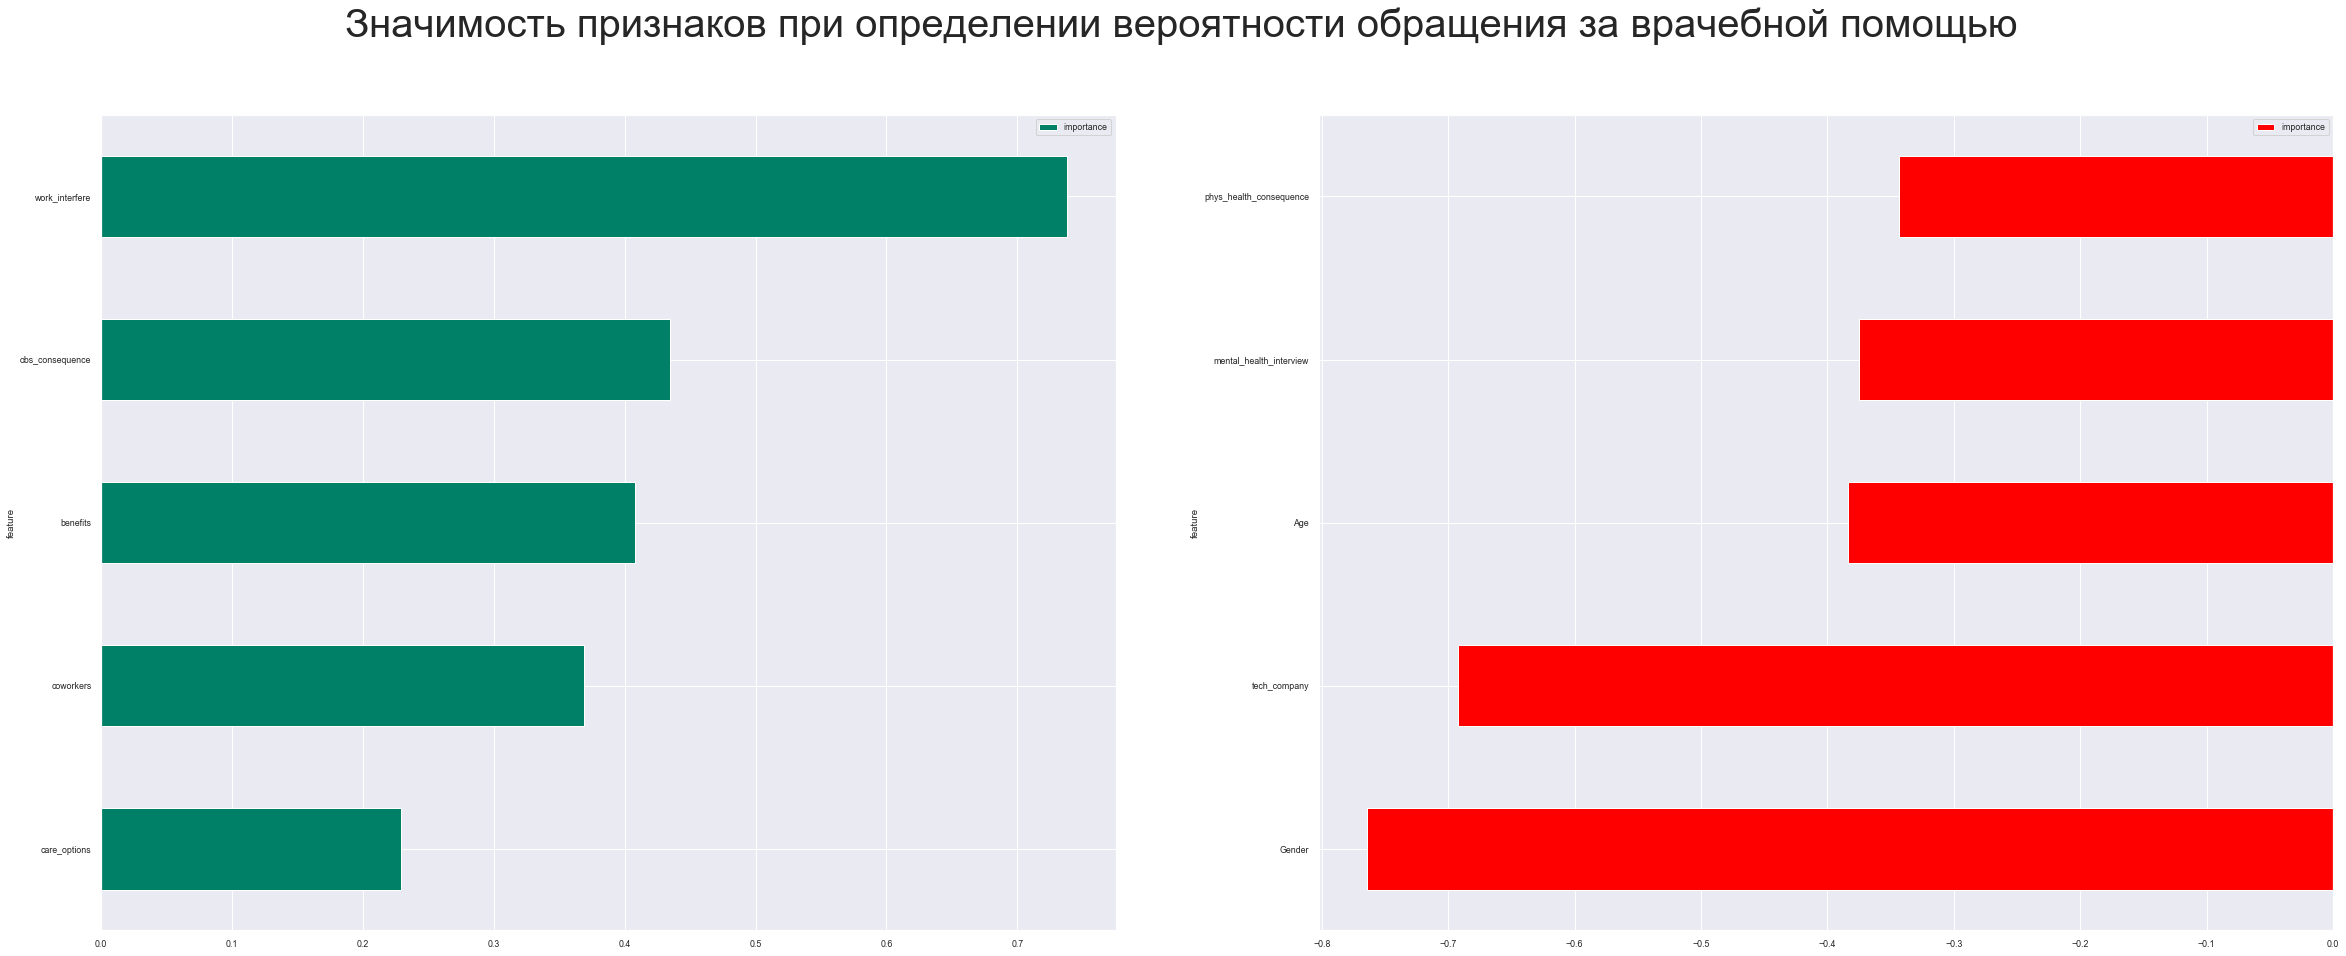

Наиболее значимые признаки:
                  importance
feature                    
care_options       0.228934
coworkers          0.369199
benefits           0.408271
obs_consequence    0.434915
work_interfere     0.738222 

Наименее значимые признаки:
                          importance
feature                            
Gender                    -0.764390
tech_company              -0.691896
Age                       -0.383726
mental_health_interview   -0.375233
phys_health_consequence   -0.343247


In [77]:
feature_importance_visual(l)

###### Строим прогнозы и визуализируем результаты

In [78]:
y_pred = predict_class(x_test, l).astype(int)

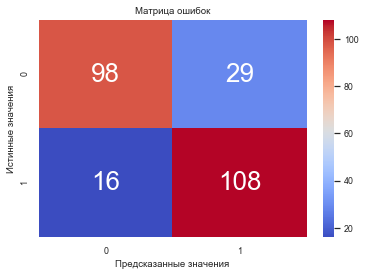

Значение accuracy:
 0.8207171314741036
Ошибка классификации:
 0.17928286852589637
Мера точности precision:
 0.7883211678832117
Мера полноты recall:
 0.8709677419354839
F-метрика:
 0.8275862068965518
Значение AUC:
 0.8213106426212853


[0.8207171314741036,
 0.7883211678832117,
 0.8709677419354839,
 0.8275862068965518,
 0.8213106426212853]

In [79]:
my_logreg_results = check_logreg(y_test, y_pred)
my_logreg_results

#### Библиотечная реализация

Время работы алгоритма = 0.024 секунд


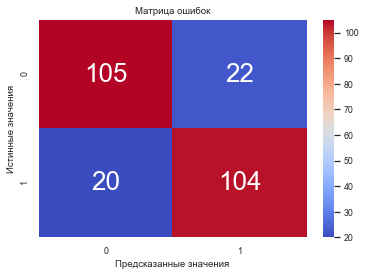

Значение Accuracy:
 0.8326693227091634
Ошибка классификации:
 0.16733067729083662
Значение точности Precision:
 0.8253968253968254
Значение полноты Recall:
 0.8387096774193549
Значение F-меры:
 0.832


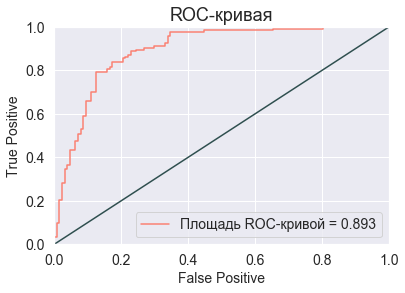

In [80]:
model1 = LogisticRegression()
time_start = time.time()
model1.fit(x_train, y_train)
time_end = time.time()
time_dif1 = time_end - time_start
print('Время работы алгоритма = {:.3f} секунд'.format(time_dif1))
model1_name = type(model1).__name__
y_predict = model1.predict(x_test)
logreg_results = score_the_model(model1, y_predict, model1_name)
logreg_results.append(time_dif1)

Отметим, что библиотечная реализация дает схожие результаты, расхождения в оценках - порядка $1%$%.
<br>
Это может быть связано с тем, что мы опустили константу $b$ при подсчете весов (взяли $b = 0$)
<br>
Время работы у нашей реализации существенно выше из-за использования простого метода поиска минимума функции.

### Наивный Байес по Гауссу (Gaussian Naive Bayes

Время работы алгоритма = 0.004 секунд


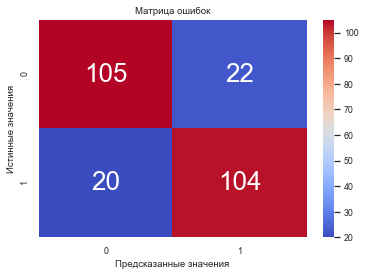

Значение Accuracy:
 0.8326693227091634
Ошибка классификации:
 0.16733067729083662
Значение точности Precision:
 0.8253968253968254
Значение полноты Recall:
 0.8387096774193549
Значение F-меры:
 0.832


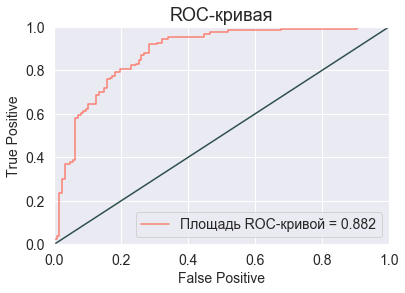

In [81]:
model2 = GaussianNB()
time_start = time.time()
model2.fit(x_train, y_train)
time_end = time.time()
time_dif2 = time_end - time_start
print('Время работы алгоритма = {:.3f} секунд'.format(time_dif2))
model2_name = type(model2).__name__
y_predict = model1.predict(x_test)
naive_bayes_results = score_the_model(model2, y_predict, model2_name)
naive_bayes_results.append(time_dif2)

### Дерево принятия решения (Decision Tree)

Время работы алгоритма = 0.007 секунд


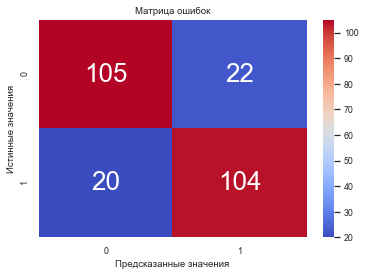

Значение Accuracy:
 0.8326693227091634
Ошибка классификации:
 0.16733067729083662
Значение точности Precision:
 0.8253968253968254
Значение полноты Recall:
 0.8387096774193549
Значение F-меры:
 0.832


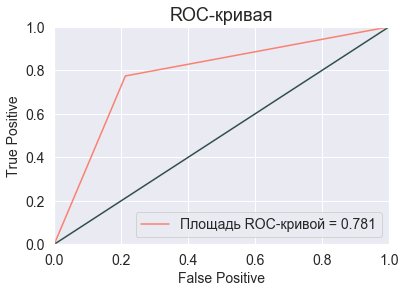

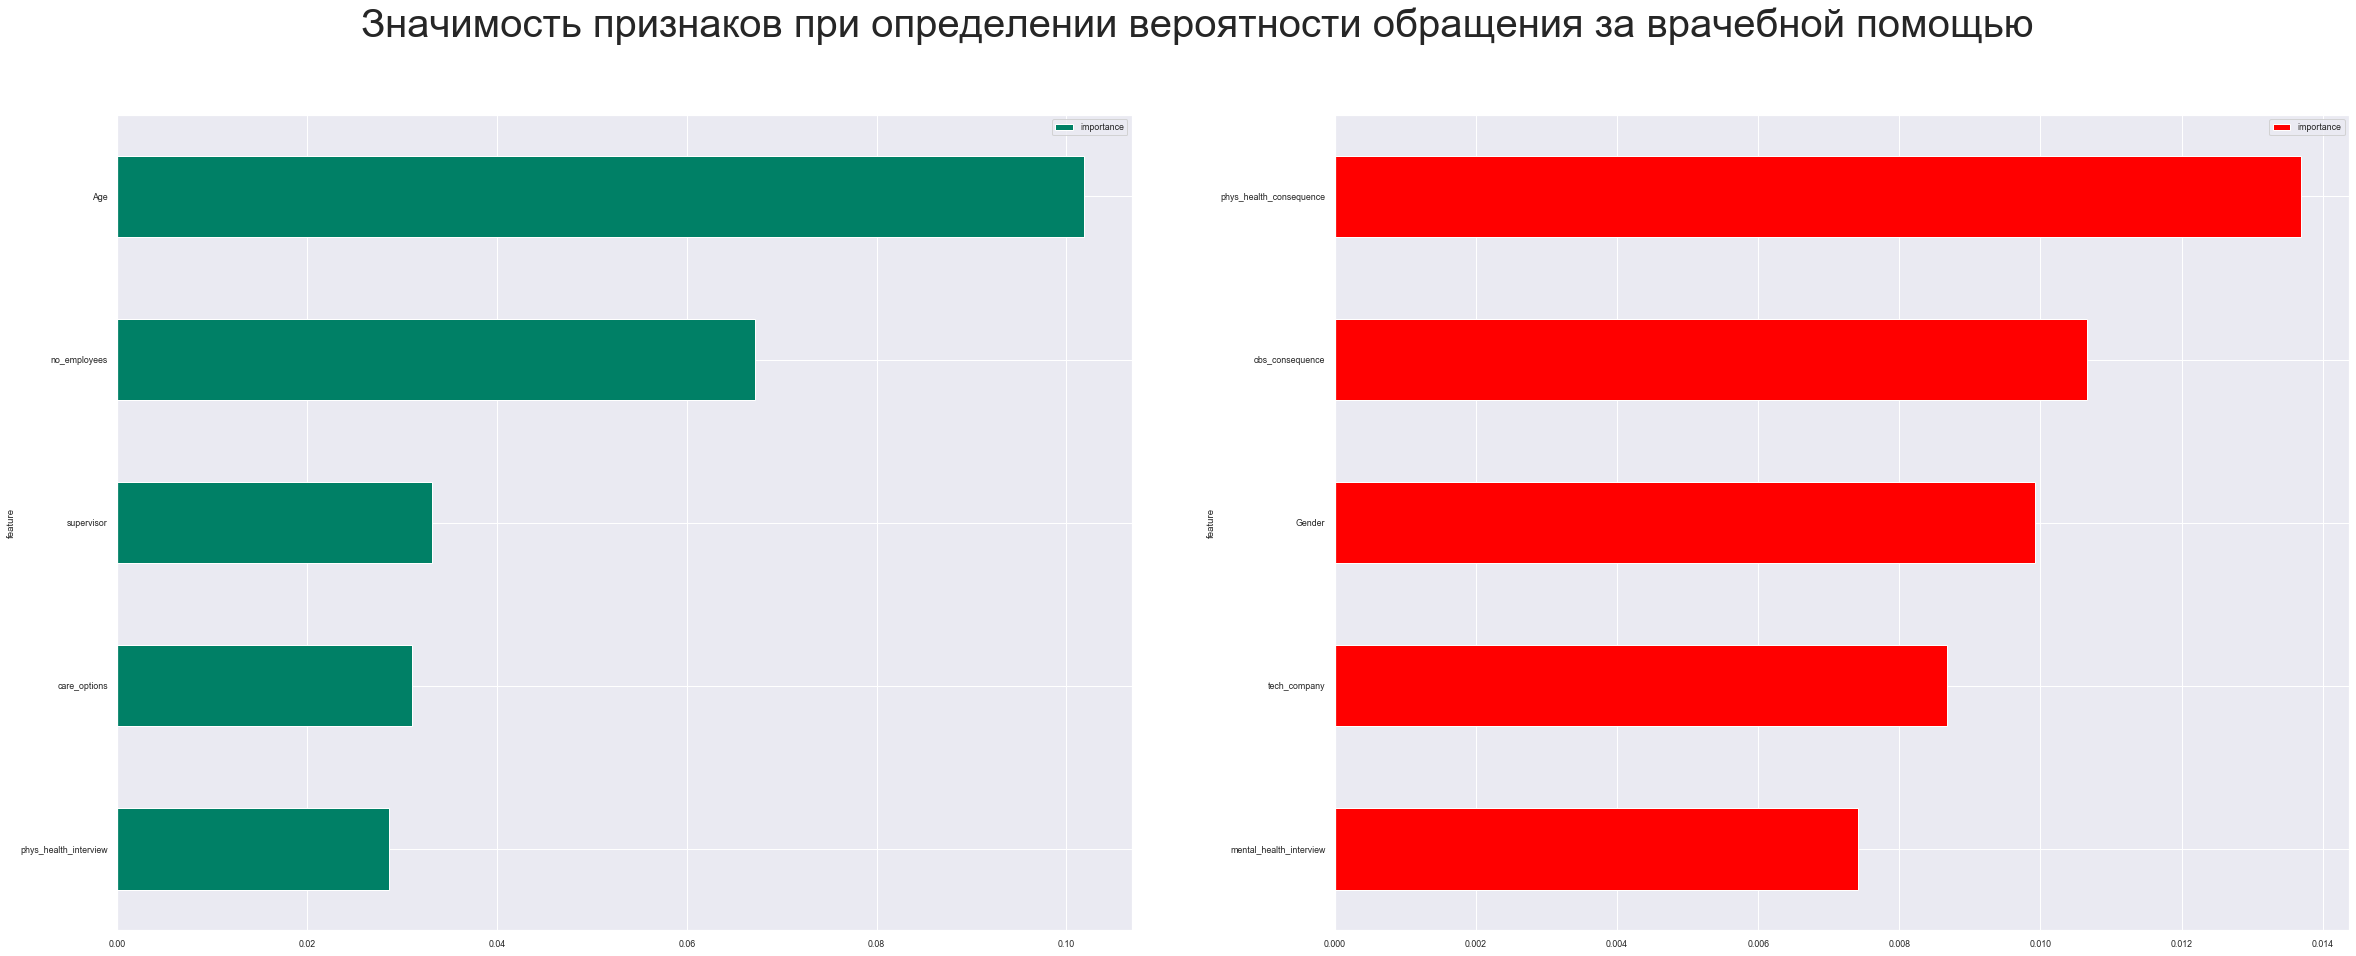

Наиболее значимые признаки:
                        importance
feature                          
phys_health_interview    0.028645
care_options             0.031005
supervisor               0.033197
no_employees             0.067200
Age                      0.101801 

Наименее значимые признаки:
                          importance
feature                            
mental_health_interview    0.007411
tech_company               0.008676
Gender                     0.009925
obs_consequence            0.010655
phys_health_consequence    0.013692


In [83]:
model3 = DecisionTreeClassifier()
time_start = time.time()
model3.fit(x_train, y_train)
time_end = time.time()
time_dif3 = time_end - time_start
print('Время работы алгоритма = {:.3f} секунд'.format(time_dif3))
model3_name = type(model3).__name__
y_predict = model1.predict(x_test)
decision_tree_results = score_the_model(model3, y_predict, model3_name)
decision_tree_results.append(time_dif3)
importances3 = model3.feature_importances_
feature_importance_visual(importances3)

### Случайный Лес (Random Forest)

Время работы алгоритма = 0.213 секунд


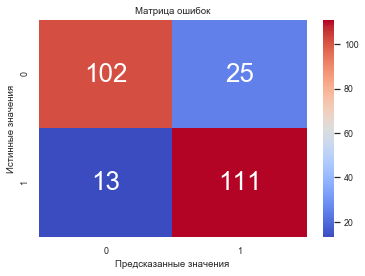

Значение Accuracy:
 0.848605577689243
Ошибка классификации:
 0.15139442231075695
Значение точности Precision:
 0.8161764705882353
Значение полноты Recall:
 0.8951612903225806
Значение F-меры:
 0.8538461538461538


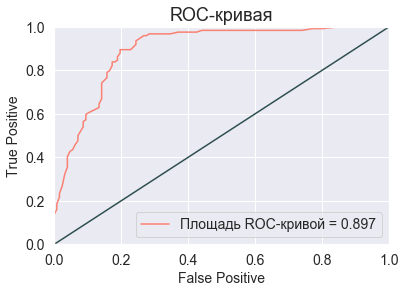

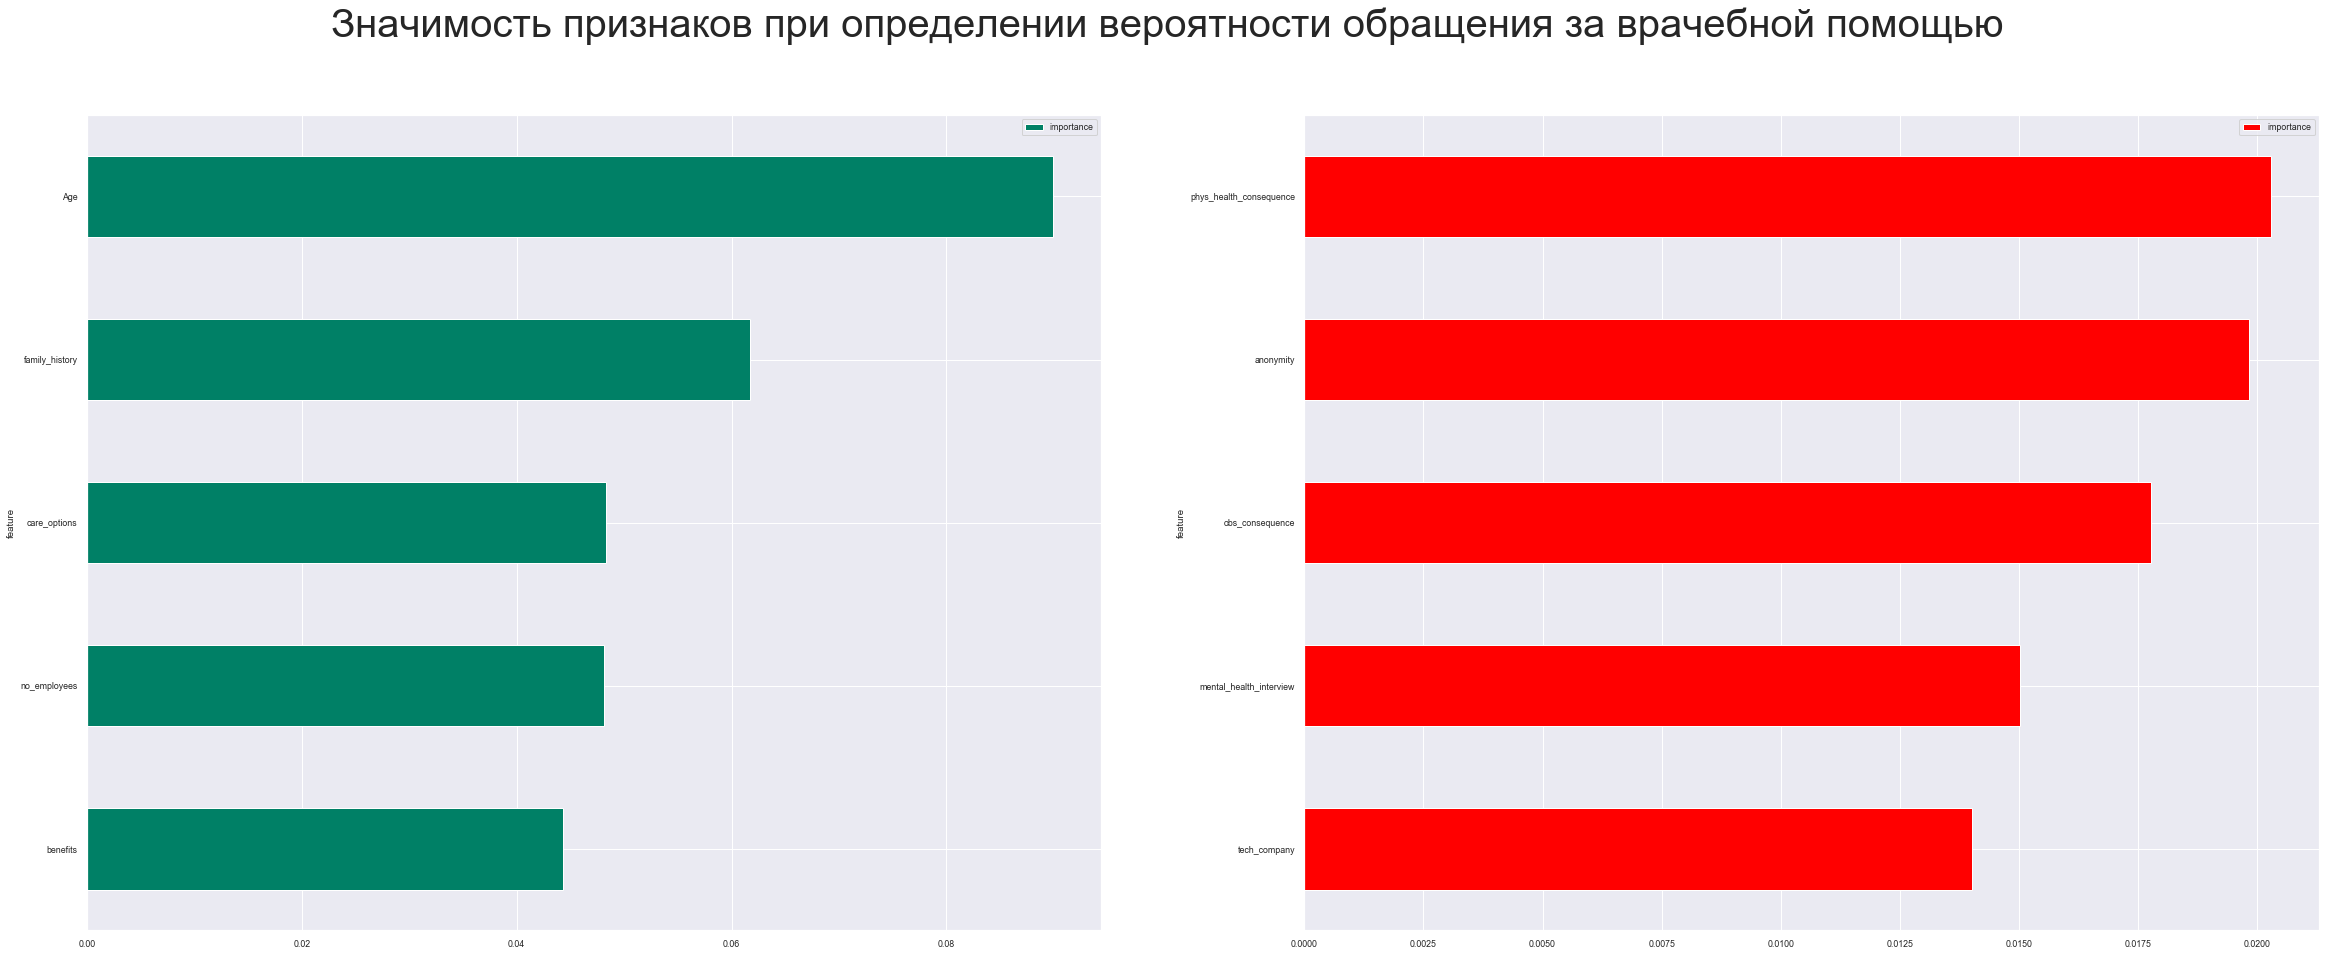

Наиболее значимые признаки:
                 importance
feature                   
benefits          0.044304
no_employees      0.048166
care_options      0.048359
family_history    0.061674
Age               0.089941 

Наименее значимые признаки:
                          importance
feature                            
tech_company               0.014021
mental_health_interview    0.015027
obs_consequence            0.017776
anonymity                  0.019827
phys_health_consequence    0.020289


In [84]:
model4 = RandomForestClassifier(max_features = 'sqrt')
time_start = time.time()
model4.fit(x_train, y_train)
time_end = time.time()
time_dif4 = time_end - time_start
print('Время работы алгоритма = {:.3f} секунд'.format(time_dif4))
model4_name = type(model4).__name__
y_predict = model4.predict(x_test)
random_forest_results = score_the_model(model4, y_predict, model4_name)
random_forest_results.append(time_dif4)
importances4 = model4.feature_importances_
feature_importance_visual(importances4)

### Метод k-ближайших соседей

Время работы алгоритма = 0.011 секунд


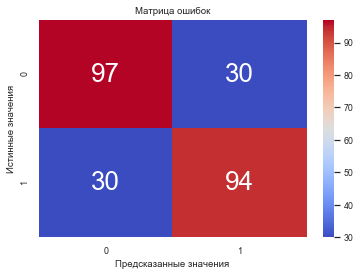

Значение Accuracy:
 0.7609561752988048
Ошибка классификации:
 0.23904382470119523
Значение точности Precision:
 0.7580645161290323
Значение полноты Recall:
 0.7580645161290323
Значение F-меры:
 0.7580645161290323


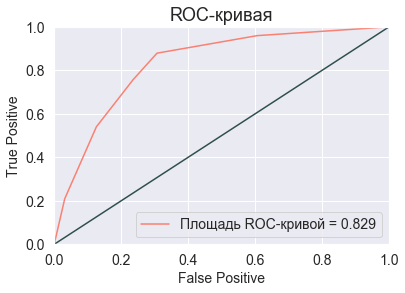

In [85]:
model5 = KNeighborsClassifier(n_neighbors = 5)
time_start = time.time()
model5.fit(x_train, y_train)
time_end = time.time()
time_dif5 = time_end - time_start
print('Время работы алгоритма = {:.3f} секунд'.format(time_dif5))
model5_name = type(model5).__name__
y_predict = model5.predict(x_test)
knn_results = score_the_model(model5, y_predict, model5_name)
knn_results.append(time_dif5)

## Итоги работы с простыми моделями

In [86]:
metric = ['Accuracy', 'Precision', 'Recall', 'F', 'AUC', 'Time']
df = {'Metric': metric, 'Logistic Regression': logreg_results, 'Naive Bayes': naive_bayes_results, 
      'Decision Tree': decision_tree_results, 'Random Forest': random_forest_results, 
      'K Nearest Neighbors': knn_results}
df_metrics = pd.DataFrame(df, columns = ['Metric', 'Logistic Regression', 'Naive Bayes',
                                        'Decision Tree', 'Random Forest',  'K Nearest Neighbors'])

###### Сводная таблица по всем метрикам

In [87]:
df_metrics

,Metric,Logistic Regression,Naive Bayes,Decision Tree,Random Forest,K Nearest Neighbors
0,Accuracy,0.832669,0.832669,0.832669,0.848606,0.760956
1,Precision,0.825397,0.825397,0.825397,0.816176,0.758065
2,Recall,0.838710,0.838710,0.838710,0.895161,0.758065
3,F,0.832000,0.832000,0.832000,0.853846,0.758065
4,AUC,0.832741,0.832741,0.832741,0.849155,0.760922
5,Time,0.024181,0.003986,0.006509,0.213191,0.011009


In [88]:
print('Всего рассмотрели', df_metrics.shape[0], 'метрик')

Всего рассмотрели 6 метрик


#### Визуализация результатов по каждой метрике
<br>
<br>
Вспомогательная функция:

In [89]:
def res_visual(i, colors):
    
    metric_name = df_metrics.iloc[i][0]
    s = df_metrics.iloc[i][1::]*100
    s = s.sort_values(ascending = False)
    plt.figure(figsize = (12,8))
    ax = s.plot(kind = 'bar', color = colors) 
    
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.xlabel('Алгоритм')
    plt.ylabel('Значение метрики')
    plt.title('Результат работы алгоритмов по метрике ' + metric_name)
    plt.show()

#### Сравнение по Accuracy:

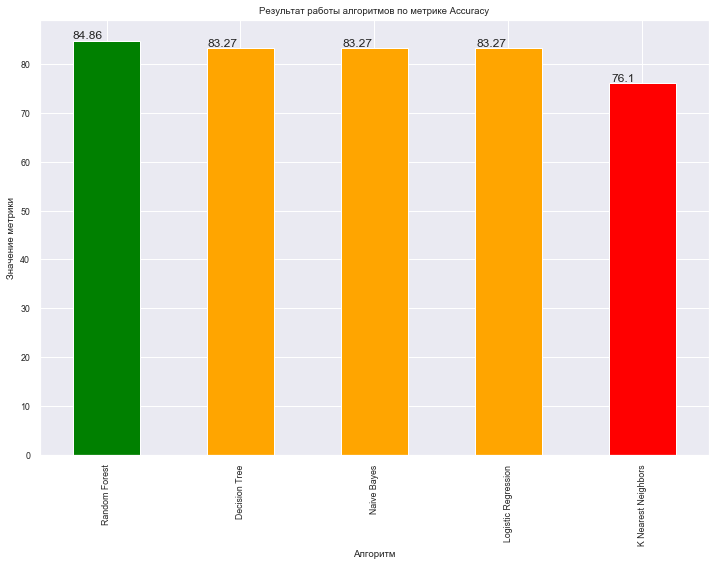

In [90]:
colors = ['green', 'orange', 'orange', 'orange', 'red']
res_visual(0, colors)

#### Сравнение по Precision:

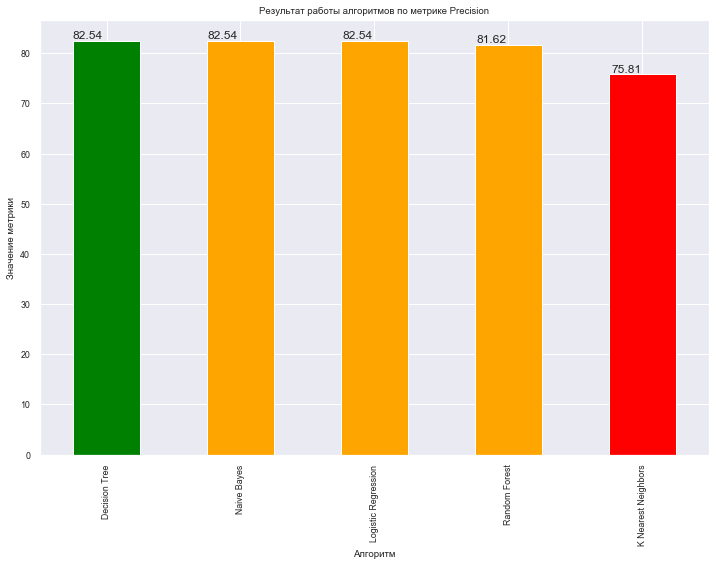

In [91]:
colors = ['green', 'orange', 'orange', 'orange', 'red']
res_visual(1, colors)

#### Сравнение по Recall:

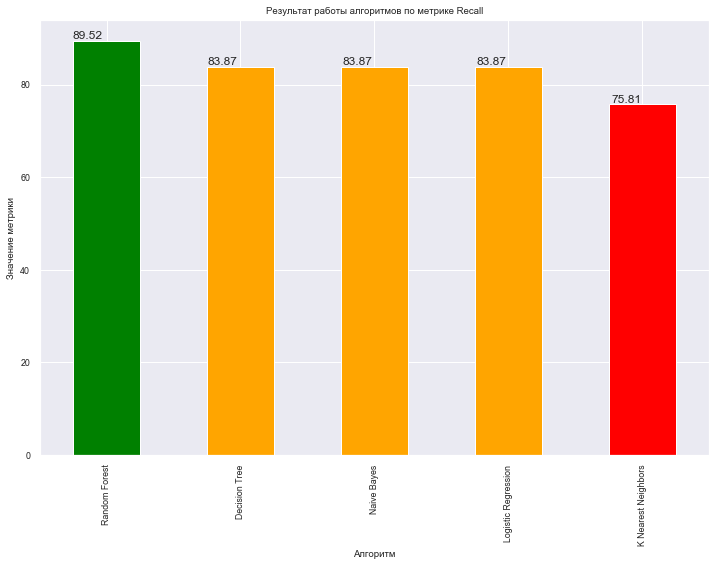

In [92]:
colors = ['green', 'orange', 'orange', 'orange', 'red']
res_visual(2, colors)

#### Сравнение по $F_1$:

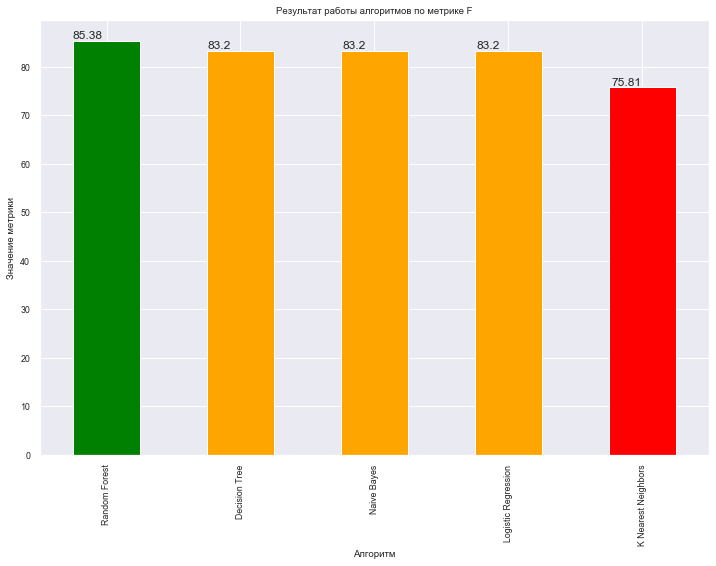

In [93]:
colors = ['green', 'orange', 'orange', 'orange', 'red']
res_visual(3, colors)

#### Сравнение по ROC_AUC:

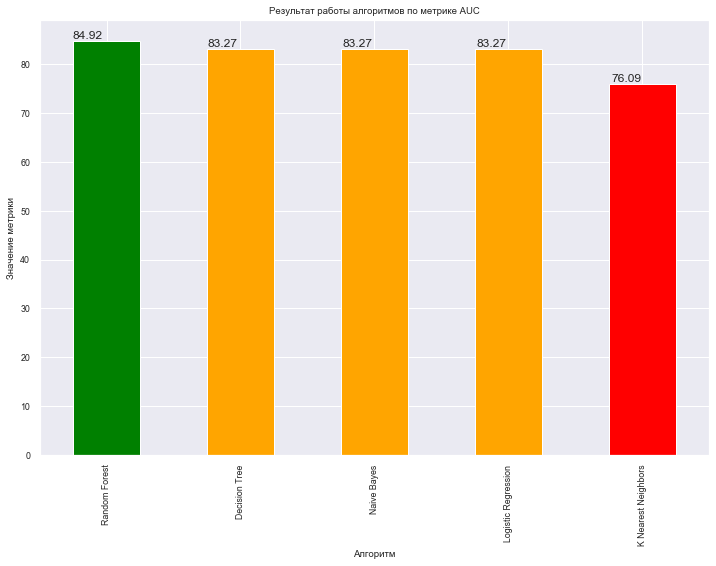

In [94]:
colors = ['green', 'orange', 'orange', 'orange', 'red']
res_visual(4, colors)

#### Сравнение по времени работы:

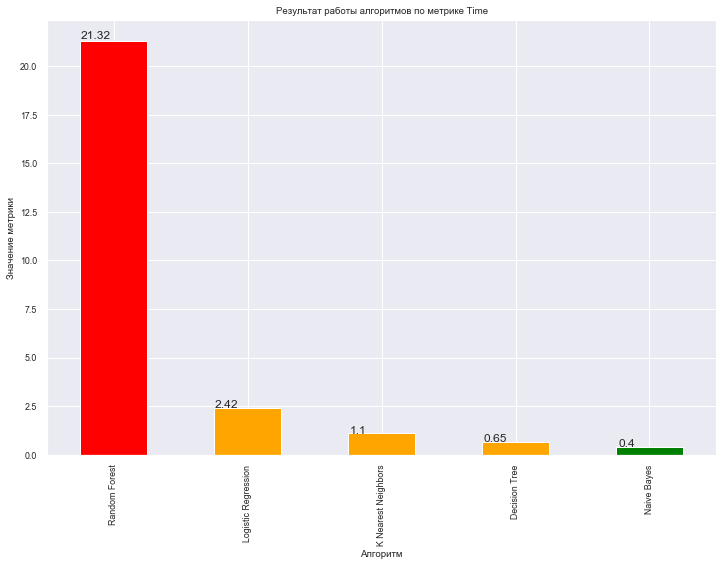

In [95]:
colors = ['red', 'orange', 'orange', 'orange', 'green']
res_visual(5, colors)

Таким образом, лучшие алгоритмы:
<br>
- $Accuracy$: **Decision Tree (Дерево принятия решения)** 
<br>
- $Precision$: **Decision Tree (Дерево принятия решения)**
<br>
- $Recall$: **Random Forest (Случайный лес)**
<br>
- $F_1$: **Decision Tree (Дерево принятия решения)**
<br>
- $ROC-AUC$: **Decision Tree (Дерево принятия решения)**
<br>
- Время работы: **Naive Bayes (Наивный Байесовский классификатор)** 

Худшие алгоритмы:
<br>
- $Accuracy$: **KNN (K ближайших соседей)** 
<br>
- $Precision$: **KNN (K ближайших соседей)** 
<br>
- $Recall$: **KNN (K ближайших соседей)** 
<br>
- $F_1$: **KNN (K ближайших соседей)** 
<br>
- $ROC-AUC$: **KNN (K ближайших соседей)** 
<br>
- Время работы: **Random Forest (Случайный лес)**

Отмечаем, что по всем метрикам лучшие результаты показывает метод решающих деревьев и, кроме того, по скорости реализации он также в топе "лидеров", после такого "базового" классификатора как Наивный Байес.
<br>
Поэтому в дальнейшем будем модифицировать именно его.

Классификаторы по методам K ближайших соседей и случайного леса на рассматриваемом датасете плохо применимы.
<br> 
Тем не менее, поскольку все модели обучались с параметрами по умолчанию, есть шанс, что при их оптимальной настройке картина поменяется.

### Ансамблевые методы (дополнительно)

Дополнительно рассмотрим более сложные модели, суть которых заключается в объединении базовых моделей для повышения точности и производительности при решении задачи.

## Градиентный бустинг

Время работы алгоритма = 0.014 секунд


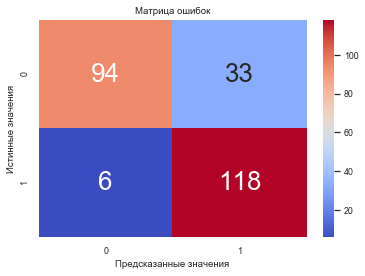

Значение Accuracy:
 0.8446215139442231
Ошибка классификации:
 0.15537848605577687
Значение точности Precision:
 0.7814569536423841
Значение полноты Recall:
 0.9516129032258065
Значение F-меры:
 0.8581818181818183


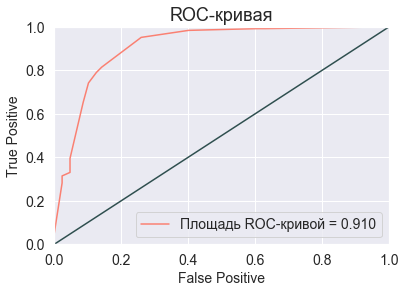

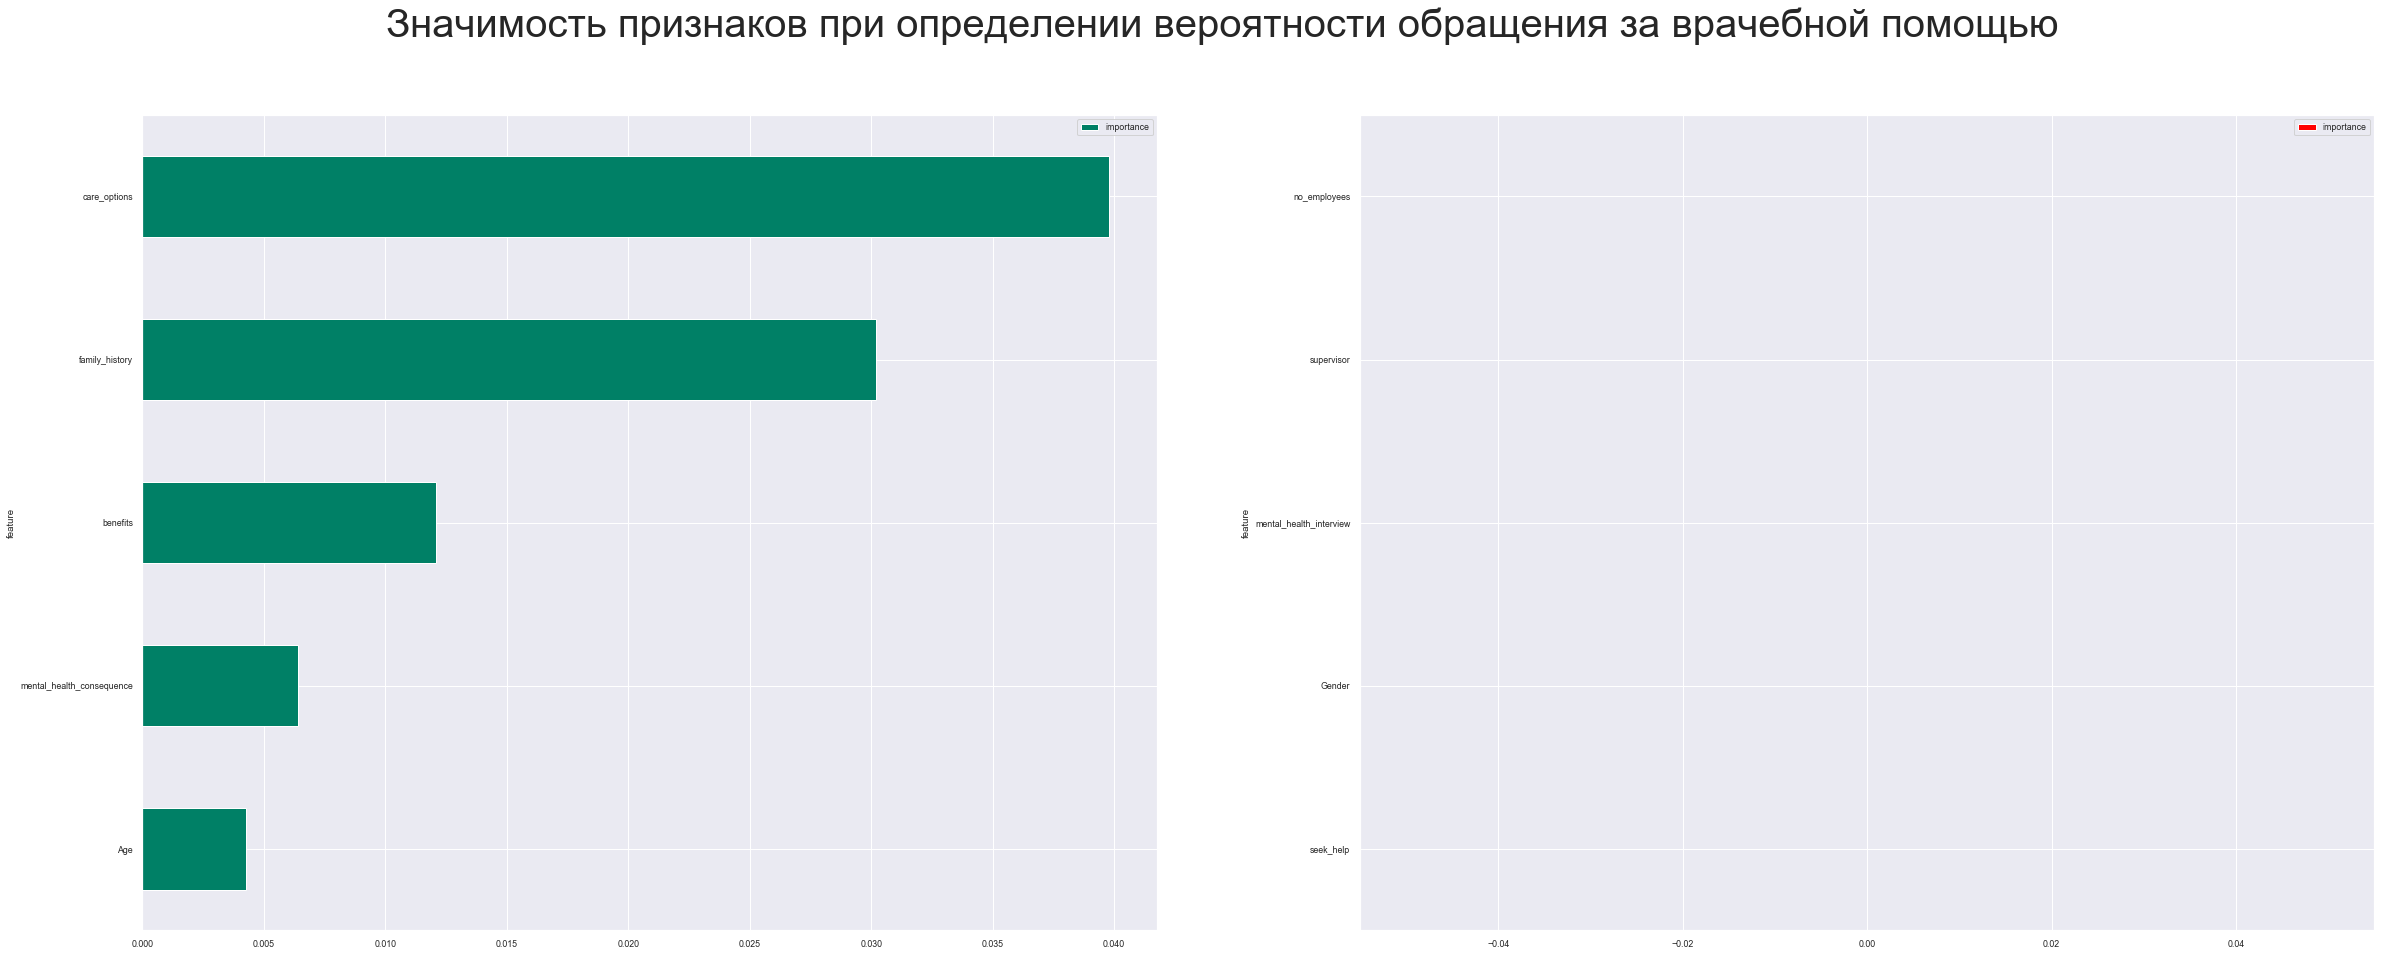

Наиболее значимые признаки:
                            importance
feature                              
Age                          0.004272
mental_health_consequence    0.006424
benefits                     0.012084
family_history               0.030184
care_options                 0.039776 

Наименее значимые признаки:
                          importance
feature                            
seek_help                       0.0
Gender                          0.0
mental_health_interview         0.0
supervisor                      0.0
no_employees                    0.0


In [96]:
model6 = GradientBoostingClassifier(n_estimators = 5)
time_start = time.time()
model6.fit(x_train, y_train)
time_end = time.time()
time_dif6 = time_end - time_start
print('Время работы алгоритма = {:.3f} секунд'.format(time_dif6))
model6_name = type(model6).__name__
y_predict = model6.predict(x_test)
gradient_boosting_results = score_the_model(model6, y_predict, model6_name)
gradient_boosting_results.append(time_dif6)
importances6 = model6.feature_importances_
feature_importance_visual(importances6)

In [97]:
df_metrics['GradientBoosting'] = gradient_boosting_results

## Бустинг

Время работы алгоритма = 0.375 секунд


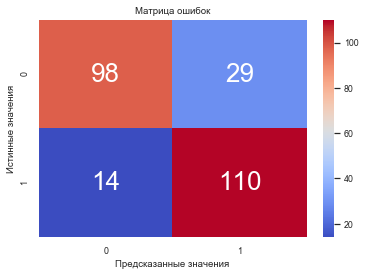

Значение Accuracy:
 0.8286852589641435
Ошибка классификации:
 0.17131474103585653
Значение точности Precision:
 0.7913669064748201
Значение полноты Recall:
 0.8870967741935484
Значение F-меры:
 0.8365019011406843


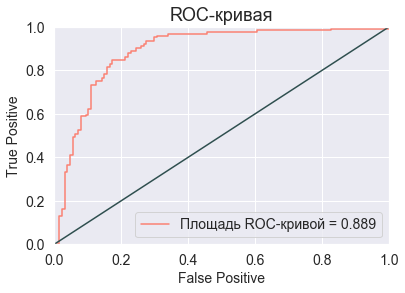

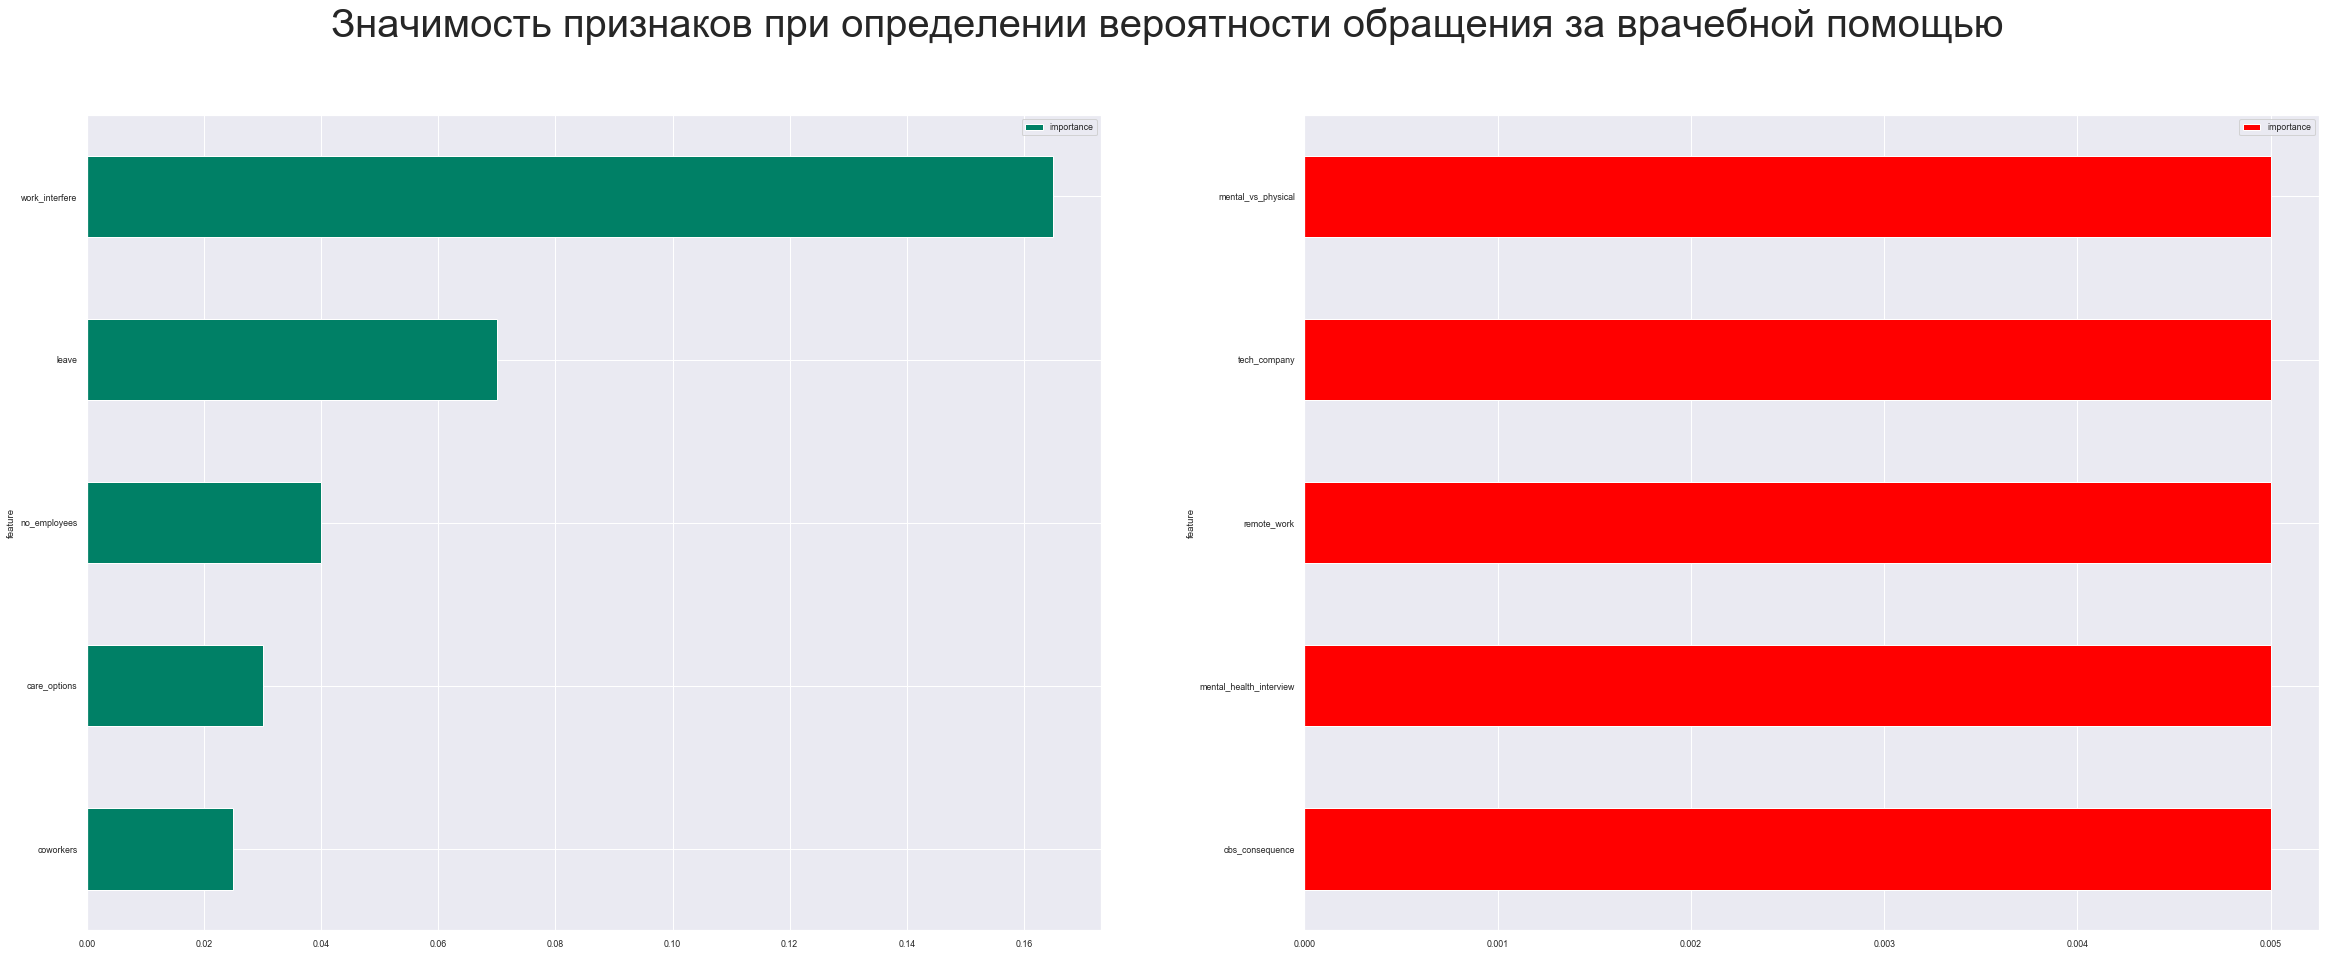

Наиболее значимые признаки:
                 importance
feature                   
coworkers            0.025
care_options         0.030
no_employees         0.040
leave                0.070
work_interfere       0.165 

Наименее значимые признаки:
                          importance
feature                            
obs_consequence               0.005
mental_health_interview       0.005
remote_work                   0.005
tech_company                  0.005
mental_vs_physical            0.005


In [98]:
base_classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 1)
model7 = AdaBoostClassifier(base_estimator = base_classifier, n_estimators = 200)

time_start = time.time()
model7.fit(x_train, y_train)
time_end = time.time()
time_dif7 = time_end - time_start
print('Время работы алгоритма = {:.3f} секунд'.format(time_dif7))

model7_name = type(model7).__name__
y_predict = model7.predict(x_test)

boosting_results = score_the_model(model7, y_predict, model7_name)
boosting_results.append(time_dif7)

importances7 = model7.feature_importances_
feature_importance_visual(importances7)

In [99]:
df_metrics['Boosting'] = boosting_results

### Stacking

In [100]:
from mlxtend.classifier import StackingClassifier

Время работы алгоритма = 0.243 секунд


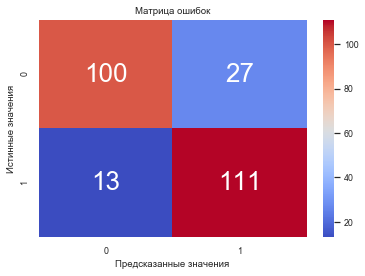

Значение Accuracy:
 0.8406374501992032
Ошибка классификации:
 0.15936254980079678
Значение точности Precision:
 0.8043478260869565
Значение полноты Recall:
 0.8951612903225806
Значение F-меры:
 0.8473282442748092


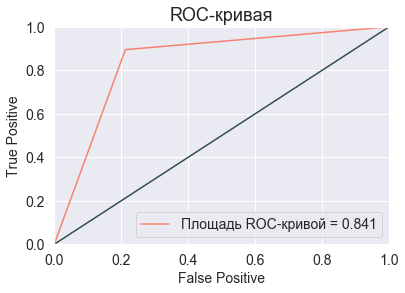

In [101]:
knn = KNeighborsClassifier(n_neighbors = 1)
rf = RandomForestClassifier(random_state = 1)
nb = GaussianNB()
lr = LogisticRegression()
model8 = StackingClassifier(classifiers = [lr, rf, nb], meta_classifier = knn)

time_start = time.time()
model8.fit(x_train, y_train)
time_end = time.time()
time_dif8 = time_end - time_start
print('Время работы алгоритма = {:.3f} секунд'.format(time_dif8))

model8_name = type(model8).__name__
y_predict = model8.predict(x_test)

stacking_results = score_the_model(model8, y_predict, model8_name)
stacking_results.append(time_dif8)

In [102]:
df_metrics['Stacking'] = stacking_results

#### Повторная визуализация результатов по каждой метрике

###### Сравнение по Accuracy:

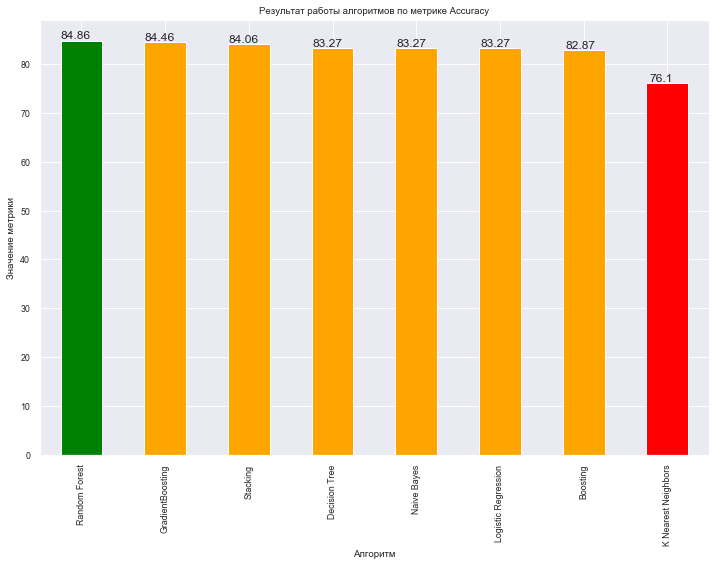

In [103]:
colors = ['green', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'red']
res_visual(0, colors)

###### Сравнение по Precision:

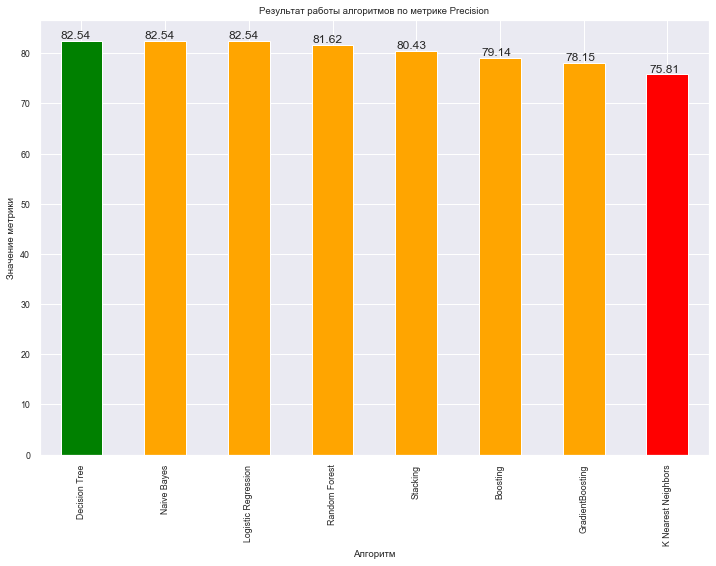

In [104]:
colors = ['green', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'red']
res_visual(1, colors)

###### Сравнение по Recall:

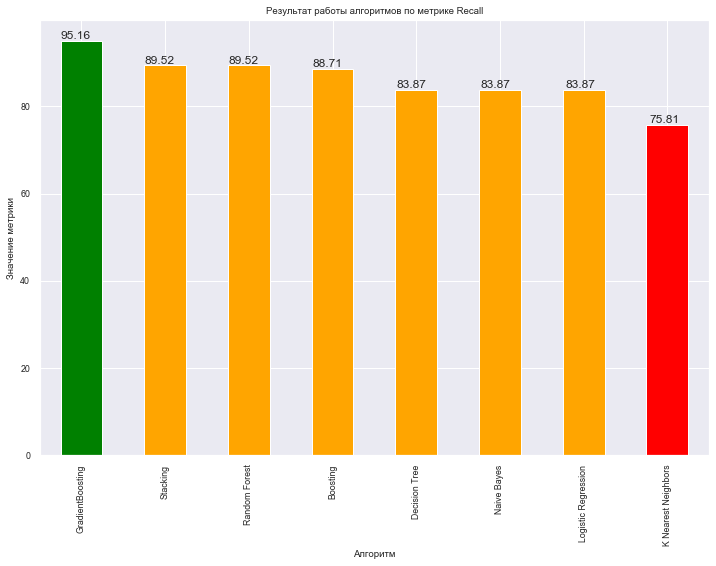

In [105]:
colors = ['green', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'red']
res_visual(2, colors)

###### Сравнение по $F_1$:

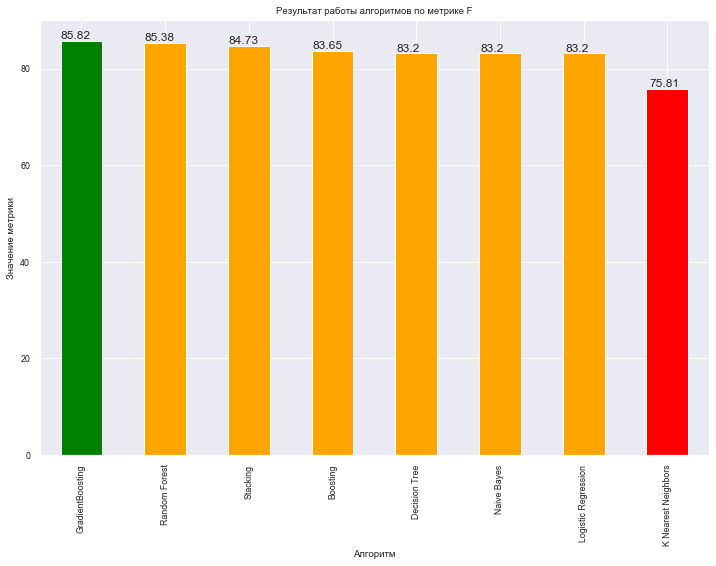

In [106]:
colors = ['green', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'red']
res_visual(3, colors)

###### Сравнение по ROC-AUC:

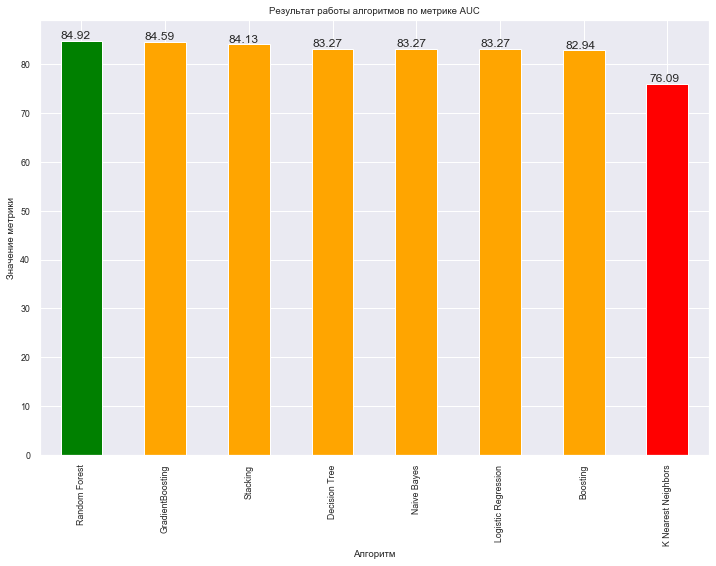

In [107]:
colors = ['green', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'red']
res_visual(4, colors)

###### Сравнение по времени работы:

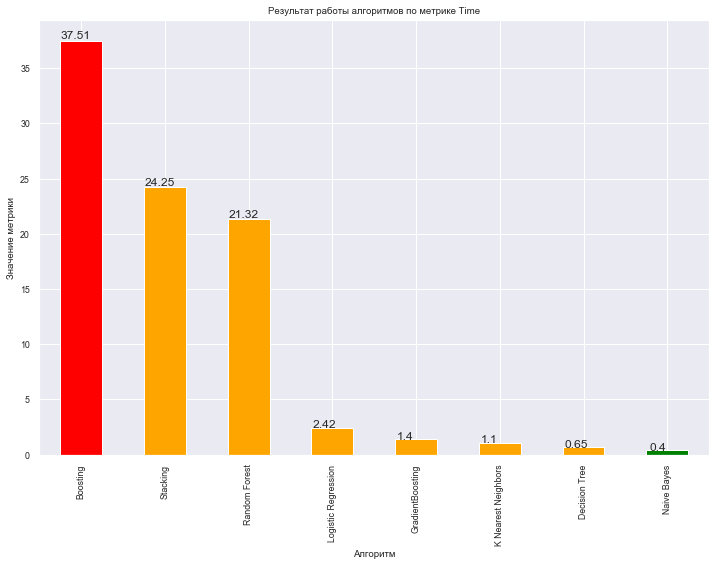

In [108]:
colors = ['red', 'orange', 'orange', 'orange',  'orange', 'orange', 'orange', 'green']
res_visual(5, colors)

Таким образом, при рассматриваемых параметрах обучения моделей ***худшим*** вновь оказался метод **K ближайших соседей**:
<br>
несмотря на относительно высокую скорость реализации, он оказывается на последнем месте по значениям всех метрик.
<br>
Самое долгое время исполнения - у методов **Boosting** и **Stacking**.

**Лучшие** результаты показывает метод **градиентного бустинга**, на ряду с, опять же, **деревом принятия решений**.
<br>
Таким образом, имеет смысл настроить данные алгоритмы оптимальным образом, чтобы добиться большей результативности классификации.

### Настройка классификатора Decision Tree с помощью Grid Search (дополнительно)

In [161]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer
from sklearn import tree

Воспользуемся показателем AUC площади под ROC-кривой в качестве метрики:

In [163]:
roc_auc_scorer = make_scorer(mr.roc_auc_score, greater_is_better = True)

In [164]:
pipe_tree = make_pipeline(tree.DecisionTreeRegressor(random_state = 1))

Установка возможных значений параметров:

In [187]:
depths = np.arange(1, 21)
feat = np.arange(1, 21)
leafs = [1, 2, 5, 10, 15, 20, 50, 100]

In [188]:
params = [{'decisiontreeregressor__max_features':feat, 'decisiontreeregressor__max_depth': depths,
          'decisiontreeregressor__min_samples_leaf': leafs}]

Подбор параметров:

In [189]:
gs = GridSearchCV(estimator = pipe_tree, param_grid = params, scoring = roc_auc_scorer)

In [190]:
pipe_tree.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'decisiontreeregressor', 'decisiontreeregressor__ccp_alpha', 'decisiontreeregressor__criterion', 'decisiontreeregressor__max_depth', 'decisiontreeregressor__max_features', 'decisiontreeregressor__max_leaf_nodes', 'decisiontreeregressor__min_impurity_decrease', 'decisiontreeregressor__min_impurity_split', 'decisiontreeregressor__min_samples_leaf', 'decisiontreeregressor__min_samples_split', 'decisiontreeregressor__min_weight_fraction_leaf', 'decisiontreeregressor__presort', 'decisiontreeregressor__random_state', 'decisiontreeregressor__splitter'])

In [191]:
gs = gs.fit(x_train, y_train)

Вывод результатов:

In [194]:
# лучшее (макисмальное) значение метрики
gs.best_score_

0.8898757490524367

In [195]:
# наиболее подходящие параметры
gs.best_params_

{'decisiontreeregressor__max_depth': 7,
 'decisiontreeregressor__max_features': 19,
 'decisiontreeregressor__min_samples_leaf': 15}

In [199]:
# лучшая модель
gs.best_estimator_

Pipeline(memory=None,
         steps=[('decisiontreeregressor',
                 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                       max_depth=7, max_features=19,
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=15, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort='deprecated', random_state=1,
                                       splitter='best'))],
         verbose=False)

#### По аналогии с предущими алгоритмами обучим оптимизированное дерево принятия решения:

Время работы алгоритма = 0.007 секунд


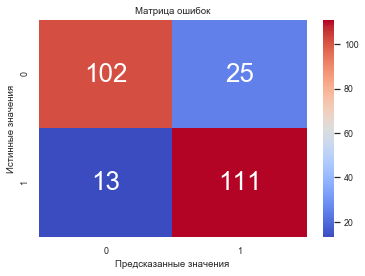

Значение Accuracy:
 0.848605577689243
Ошибка классификации:
 0.15139442231075695
Значение точности Precision:
 0.8161764705882353
Значение полноты Recall:
 0.8951612903225806
Значение F-меры:
 0.8538461538461538


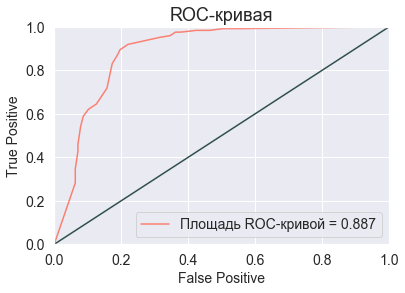

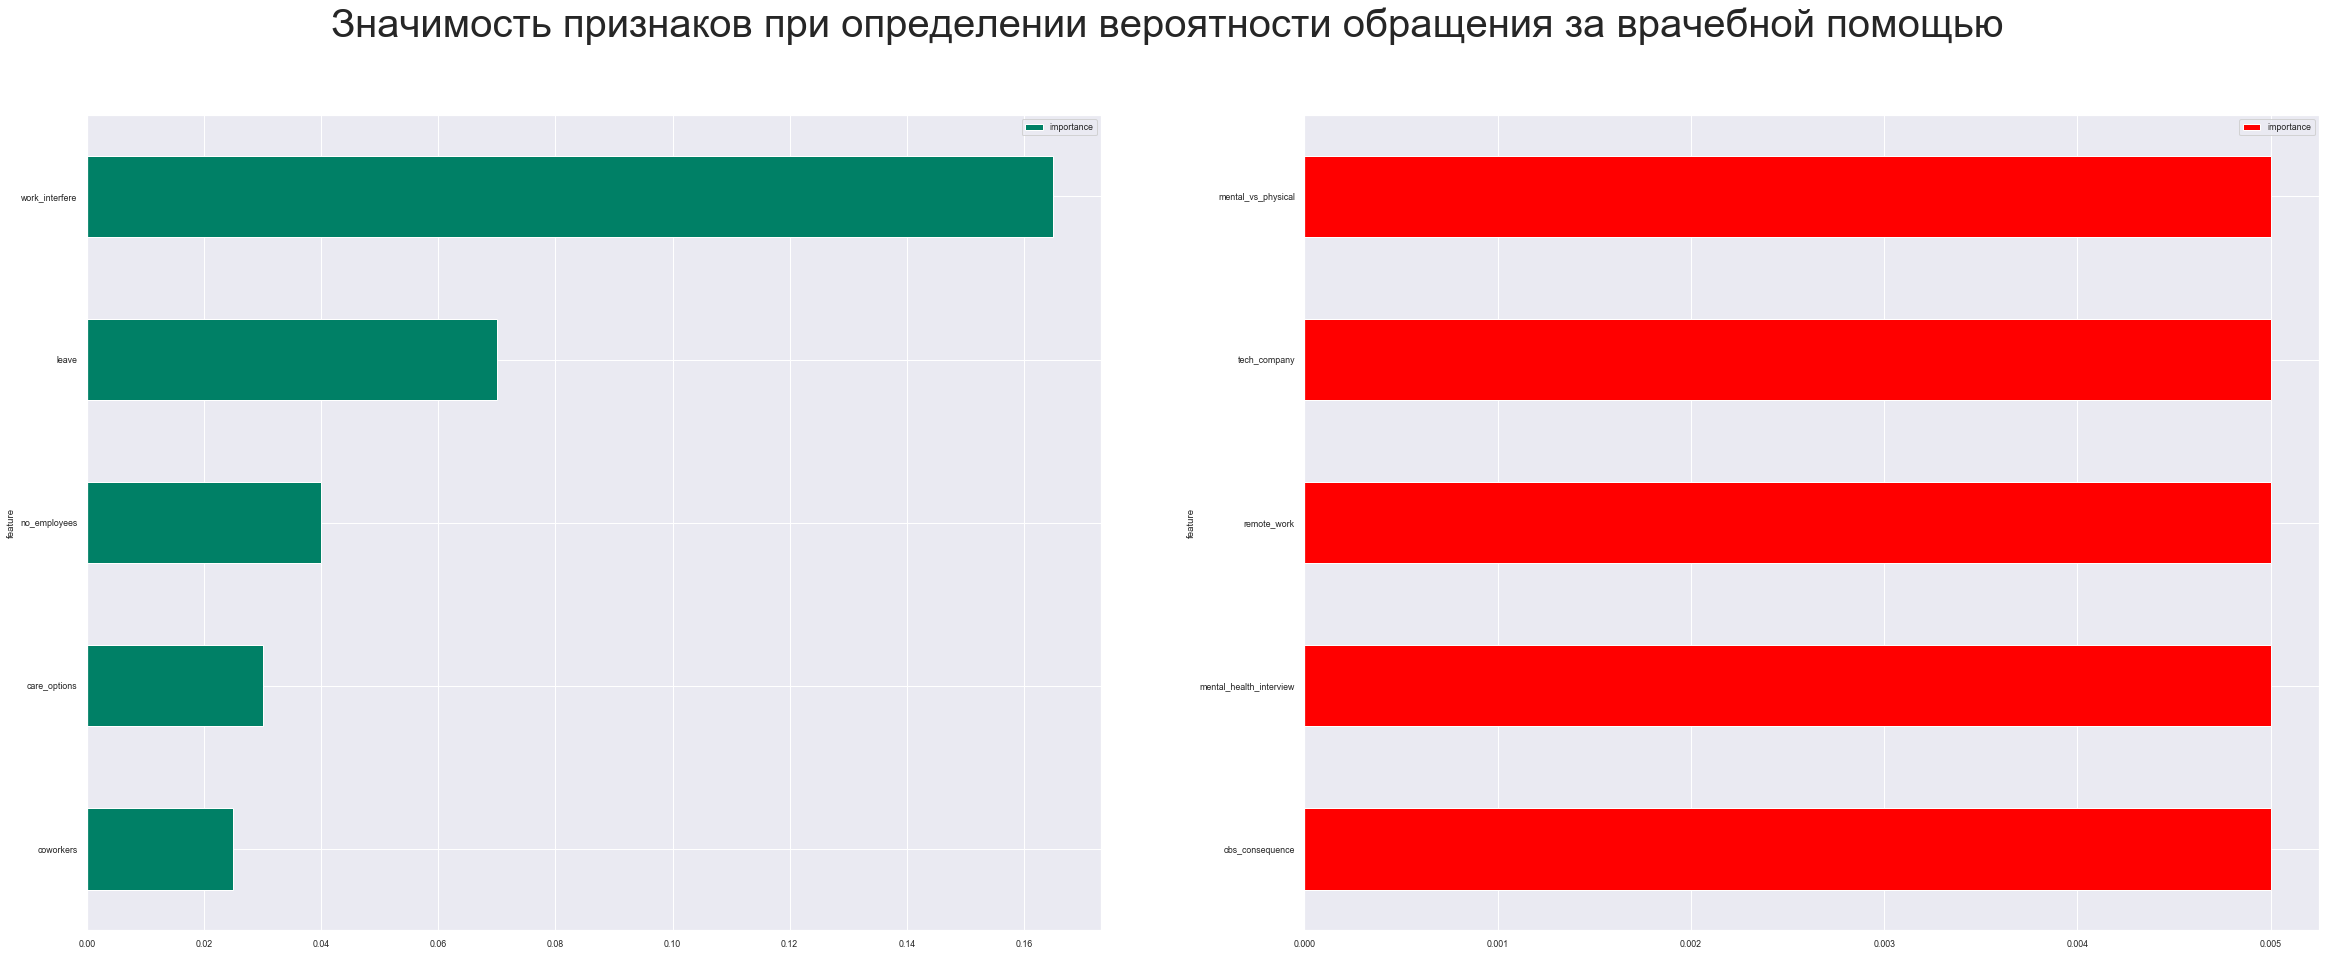

Наиболее значимые признаки:
                 importance
feature                   
coworkers            0.025
care_options         0.030
no_employees         0.040
leave                0.070
work_interfere       0.165 

Наименее значимые признаки:
                          importance
feature                            
obs_consequence               0.005
mental_health_interview       0.005
remote_work                   0.005
tech_company                  0.005
mental_vs_physical            0.005


In [221]:
model9 = DecisionTreeClassifier(ccp_alpha = 0.0, max_depth = 7, max_features = 19,
                               max_leaf_nodes = None, min_impurity_decrease = 0.0, min_impurity_split = None,
                               min_samples_leaf = 15, min_samples_split = 2, min_weight_fraction_leaf = 0.0,
                               presort='deprecated', random_state = 1, splitter = 'best')

time_start = time.time()
model9.fit(x_train, y_train)
time_end = time.time()
time_dif9 = time_end - time_start
print('Время работы алгоритма = {:.3f} секунд'.format(time_dif9))

model9_name = type(model9).__name__
y_predict = model9.predict(x_test)

DT_optimised_results = score_the_model(model9, y_predict, model9_name)
DT_optimised_results.append(time_dif9)

importances9 = model9.feature_importances_
feature_importance_visual(importances7)

In [213]:
df_metrics['Optim Decision Tree'] = DT_optimised_results

##### Сравним модели по метрикам Accuracy, ROC_AUC и времени выполнения:

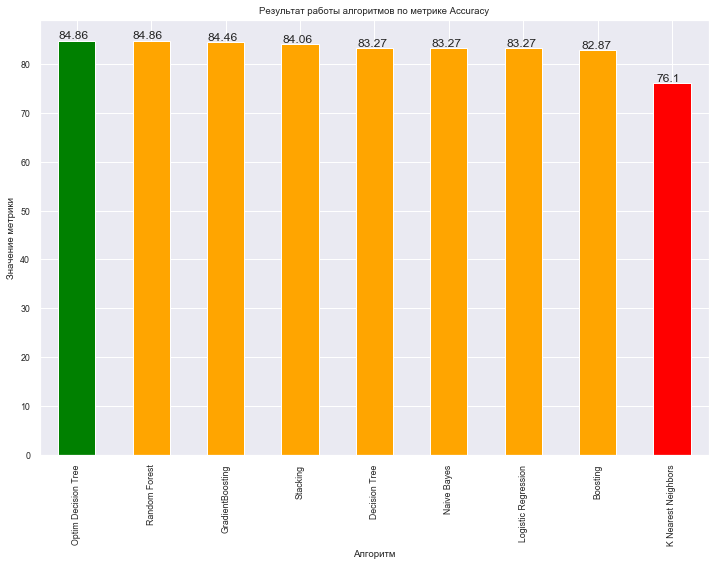

In [222]:
colors = ['green', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'red']
res_visual(0, colors)

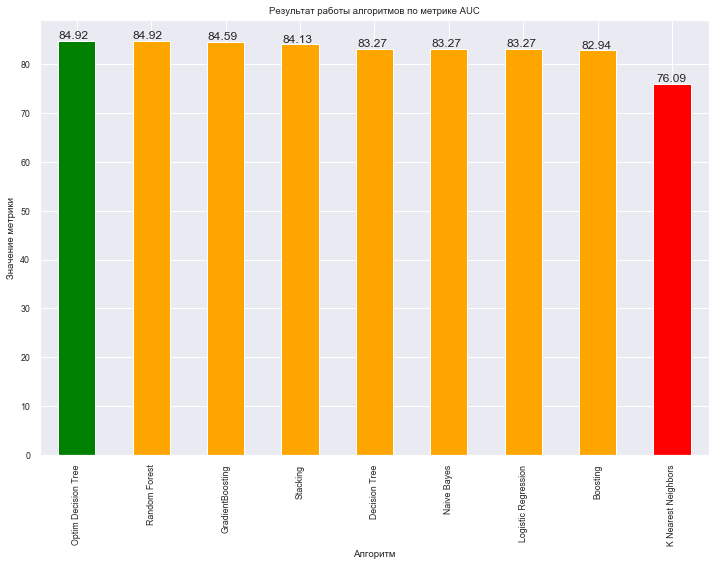

In [218]:
colors = ['green', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'red']
res_visual(4, colors)

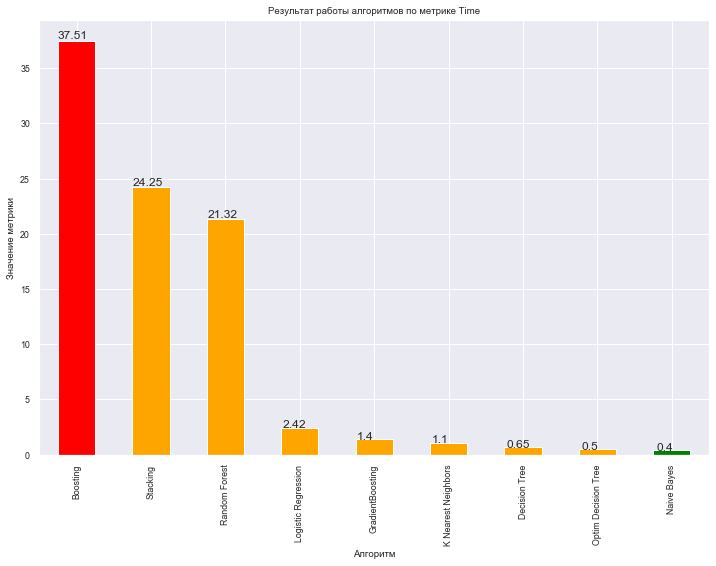

In [219]:
colors = ['red', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'green']
res_visual(5, colors)

Таким образом, наш алгоритм после оптимизации параметров не только занял лидирующую позицию по результативности, но также и по времени выполнения (предпоследнее место, после Наивного Байеса)

## Сводная таблица со всеми моделями и метриками

In [223]:
df_metrics

,Metric,Logistic Regression,Naive Bayes,Decision Tree,Random Forest,K Nearest Neighbors,GradientBoosting,Boosting,Stacking,Optim Decision Tree
0,Accuracy,0.832669,0.832669,0.832669,0.848606,0.760956,0.844622,0.828685,0.840637,0.848606
1,Precision,0.825397,0.825397,0.825397,0.816176,0.758065,0.781457,0.791367,0.804348,0.816176
2,Recall,0.838710,0.838710,0.838710,0.895161,0.758065,0.951613,0.887097,0.895161,0.895161
3,F,0.832000,0.832000,0.832000,0.853846,0.758065,0.858182,0.836502,0.847328,0.853846
4,AUC,0.832741,0.832741,0.832741,0.849155,0.760922,0.845885,0.829375,0.841281,0.849155
5,Time,0.024181,0.003986,0.006509,0.213191,0.011009,0.014031,0.375067,0.242539,0.004986


## Выводы

Таким образом, удалось добиться более чем 80 % правильности разбиения работников по классам "есть риск психического заболевания" или "нет риска психического заболевания", а более конкретно - определить, обращался/обратится ли человек в будущем за помощью в лечении ментальных расстройств на основании отношения к данной проблеме в его корпоративной среде и субъективных ощущений.

Наиболее весомый вклад в определение принадлежности к одному из классов вносило значение признака **work_interfere**.
<br>
А гендер и возраст (признаки **Gender** и **Age** соответственно) оказались не так значимы, как предполагалось ранее.
<br>
Возможно, они коррелируют с признаком **work_interfere** и тогда их влияние подавляется за счет этого.

Среди дальнейших перспектив в работе над данной задачей можно выделить:
- построение моделей с наименьшим кол-вом признаков
- с заменой конкретного возраста человека на его принадлежность к одной из возрастных групп
- оптимизацию прочих моделей с высокой скоростью реализации и значениями метрик
- настройку ансамблевых алгоритмов, показавших высокую точность прогноза
- создание нейросети